# **Práctica 1** - Lucía Pazos Santiago, Anxo Trillo Santamaría, Javier Ares Vila

En primer lugar, se importarán las librerías necesarias para el desarrollo de esta práctica. Algunas de ellas no están incluidas por defecto en Google Colab, por lo que será necesario instalarlas antes de usarlas.

In [1]:
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import *
from sklearn.feature_selection import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import RandomUnderSampler

## Carga y preprocesado


### Carga

A continuación, cargamos el conjunto de datos de entrenamiento desde un archivo CSV utilizando la biblioteca pandas. Para ello, usamos la función pd.read_csv(), especificando el nombre del archivo y el delimitador de los campos (en este caso, una coma ,).

Después de la carga, mostramos el contenido del DataFrame con print(df), lo que nos permitirá visualizar una primera impresión de los datos y comprobar que se han importado correctamente.

In [ ]:
df = pd.read_csv('./train.csv', delimiter=',')
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               6.4             0.310         0.26            13.2      0.046   
1               6.3             0.220         0.34             1.2      0.036   
2               5.9             0.415         0.13             1.4      0.040   
3               6.0             0.330         0.38             9.7      0.040   
4               7.8             0.320         0.33            10.4      0.031   
...             ...               ...          ...             ...        ...   
3913            6.8             0.160         0.36             1.3      0.034   
3914            7.1             0.200         0.27             9.6      0.037   
3915            6.9             0.400         0.56            11.2      0.043   
3916            7.0             0.150         0.28            14.7      0.051   
3917            7.5             0.420         0.20             1.4      0.060   

      free sulfur dioxide  

### Valores faltantes

En primer lugar, vamos a comprobar si alguna columna del dataset contiene algún valor nulo. Para ello se usa df.isnull() que devuelve un dataframe de valores boleanos donde True indica que el valor es nulo. Al añadir el .any() se verifica si hay al menos un valor True (nulo) por cada columna.

In [ ]:
missing_any = df.isnull().any()
print(missing_any)

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


El resultado nos muestra que el dataset no contiene valores nulos, pero vamos a asegurarnos también de que no contenga valores en blanco.

Para ello, utilizamos la expresión df == ' ', que genera una matriz booleana donde True indica la presencia de valores vacíos. Luego, aplicamos .any(axis=1), que devuelve True si al menos una columna en la fila contiene un valor en blanco.

El resultado se almacena en blank_rows, que contendrá únicamente las filas con valores vacíos. Al imprimir la variable por pantalla se muestra que no hay ningún valor vacío.

In [ ]:
blank_rows = df[(df == '').any(axis=1)]
print("Rows with blank values:\n", blank_rows)

Rows with blank values:
 Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []


### Valores duplicados

Para encontrar los valores duplicados utilizaremos la función drop_duplicates() con una configuración que permite eliminar filas/columnas duplicadas manteniendo solo la primera fila/columna del conjunto de duplicados devolviendo un nuevo dataset. En este dataset, se podía apreciar que no existían columnas duplicadas, pero podría ser útil en otros conjuntos de datos con muchas columnas. En el primer bloque de código se muestra el conteo de filas inicial y final (que se reduce) y en el segundo se muestra lo mismo aplicado a columnas (se mantiene).
Posteriormente se imprime el dataset con el que contamos ahora mismo (se resalta el hecho de que la numeración de las filas ahora es incorrecta, pues no coincide con el conteo total.)

In [ ]:
# Eliminar filas duplicadas
df2 =df.drop_duplicates(subset=None, keep='first', inplace=False)
print(len(df))
print(len(df2))

3918
3304


In [ ]:
# Eliminar columnas duplicadas
df3 = df2.T.drop_duplicates(subset=None, keep='first', inplace=False).T
print(len(df2))
print(len(df3))

3304
3304


In [ ]:
print(df3) #Imprimimos el dataframe tras eliminar todos los duplicados

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               6.4             0.310         0.26            13.2      0.046   
1               6.3             0.220         0.34             1.2      0.036   
2               5.9             0.415         0.13             1.4      0.040   
3               6.0             0.330         0.38             9.7      0.040   
4               7.8             0.320         0.33            10.4      0.031   
...             ...               ...          ...             ...        ...   
3909            6.3             0.280         0.29             6.8      0.051   
3910            7.2             0.200         0.38             1.0      0.037   
3912            6.6             0.280         0.36             1.7      0.038   
3913            6.8             0.160         0.36             1.3      0.034   
3917            7.5             0.420         0.20             1.4      0.060   

      free sulfur dioxide  

### Creación de variables derivadas

Se añadirá una nueva columna de nombre 'booleano' al dataframe que indique si un vino es de buena (1) o mala (0) calidad acorde al enunciado. Las calidades mayores o iguales a siete se marcan como buenas y las restantes a malas.
A su vez, se borra la columna de calidad.

In [ ]:
calbool=[]
for i in df2['quality']:
  if i>=7:
    calbool.append(1)
  else:
    calbool.append(0)

print(len(calbool))

3304


In [ ]:
df3['booleano']=calbool
df3 = df3.drop(columns=["quality"]) #Ahora que tenemos la variable objetivo, ya no necesitamos la calidad
print(df3)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               6.4             0.310         0.26            13.2      0.046   
1               6.3             0.220         0.34             1.2      0.036   
2               5.9             0.415         0.13             1.4      0.040   
3               6.0             0.330         0.38             9.7      0.040   
4               7.8             0.320         0.33            10.4      0.031   
...             ...               ...          ...             ...        ...   
3909            6.3             0.280         0.29             6.8      0.051   
3910            7.2             0.200         0.38             1.0      0.037   
3912            6.6             0.280         0.36             1.7      0.038   
3913            6.8             0.160         0.36             1.3      0.034   
3917            7.5             0.420         0.20             1.4      0.060   

      free sulfur dioxide  

In [ ]:
conteo = df3['booleano'].value_counts() #Comprobamos cuántos datos hay de cada clase
print(conteo)

booleano
0    2606
1     698
Name: count, dtype: int64


### Valores atípicos

Gestionar los valores atípicos es un paso clave en el preprocesado de datos ya que estos pueden afectar a la precisión del modelo.

En este caso para su gestión utilizamos el método del rango intercuartílico para identificar y eliminar outliers en todas las columnas excepto en la de la variable de salida.

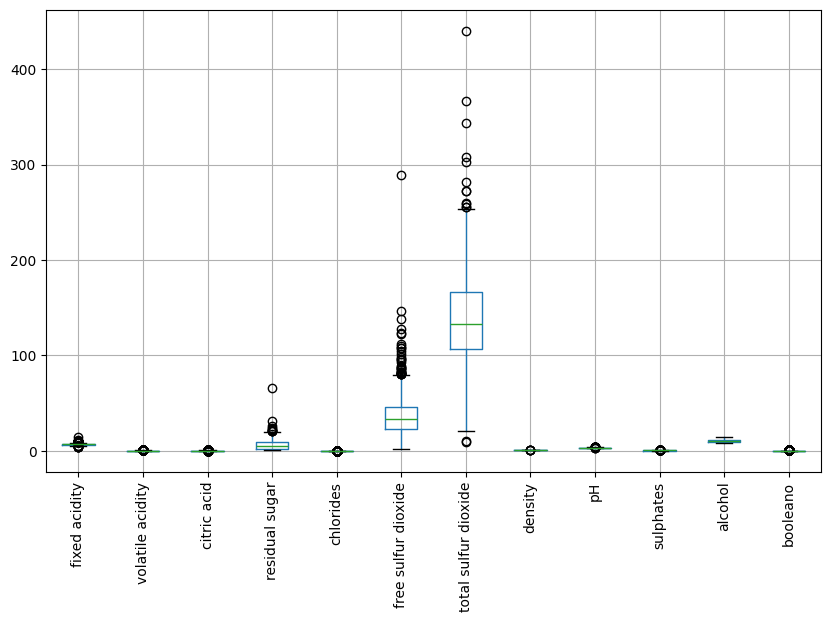

In [ ]:
# Boxplot antes de eliminar valores atípicos
df3.boxplot(figsize=(10,6))
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Función para filtrar outliers
def filtrar_outliers(df, columnas):
    for col in columnas:
        Q1 = df[col].quantile(0.25) #Cuartiles
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1 #Rango intercuartilico
        lim_inf = Q1 - 2 * IQR #Definimos los límites
        lim_sup = Q3 + 2 * IQR

        df = df[(df[col] >= lim_inf) & (df[col] <= lim_sup)] #Filtramos los datos que estén fuera de los limites
    return df

In [ ]:
df_filtr = df3.copy()
df_filtr = filtrar_outliers(df_filtr, df_filtr.columns[:-1]) #Filtramos en todas las columnas menos en la de calidad
print(df_filtr)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               6.4             0.310         0.26            13.2      0.046   
1               6.3             0.220         0.34             1.2      0.036   
2               5.9             0.415         0.13             1.4      0.040   
3               6.0             0.330         0.38             9.7      0.040   
4               7.8             0.320         0.33            10.4      0.031   
...             ...               ...          ...             ...        ...   
3909            6.3             0.280         0.29             6.8      0.051   
3910            7.2             0.200         0.38             1.0      0.037   
3912            6.6             0.280         0.36             1.7      0.038   
3913            6.8             0.160         0.36             1.3      0.034   
3917            7.5             0.420         0.20             1.4      0.060   

      free sulfur dioxide  

Como podemos ver si mostramos de nuevo los diagramas de caja, se eliminaron los datos más extremos de cada columna

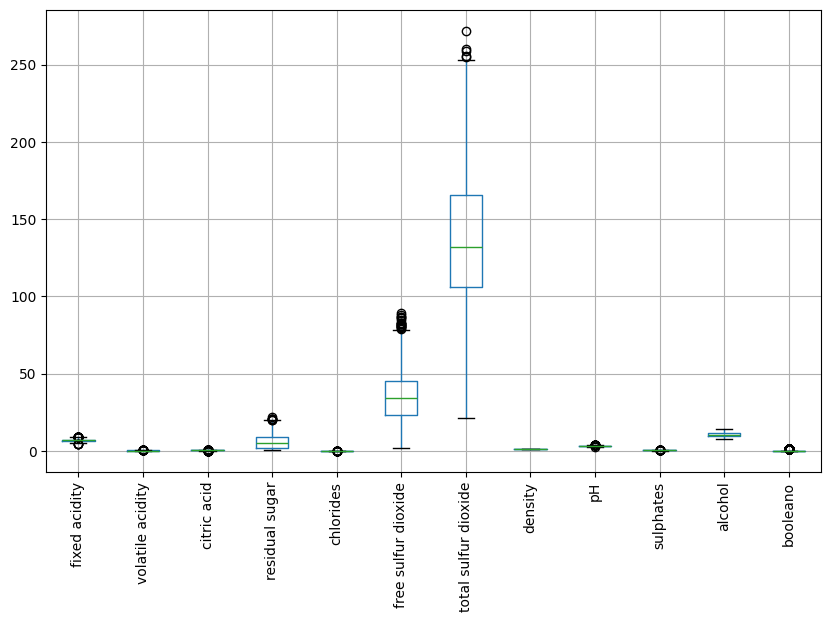

In [ ]:
#Boxplot después de eliminar valores atípicos
df_filtr.boxplot(figsize=(10,6))
plt.xticks(rotation=90)
plt.show()

## Reducción de dimensionalidad

El paquete scikit-learn permite tanto escoger las características más importantes como crear nuevas características a partir de las originales.

En nuestro caso, para mejorar el rendimiento del modelo y eliminar información redundante hemos optado por aplicar SelectKBest que permite reducir el número de variables quedándonos con las más relevantes según su relación con la variable objetivo. Además, este método permite que las variables que analicemos sigan teniendo un significado claro de qué representan, cosa que no sucede si se utilizan otros métodos cuyas variables son combinaciones de las ya existentes, como en PCA.

Para nuestro dataset, si observamos los scores de cada columna vemos que las 5 primeras tienen una puntuación bastante más alta que las restantes, por lo que decidimos quedarnos con estas 5 características, que son las que más influyen en la variable de salida.


In [ ]:
df_sinbool=df_filtr.drop(columns=["booleano"])
df_bool = df_filtr["booleano"]

# Aplicar SelectKBest para seleccionar características relevantes
ncomponentes=5 #se cambia aqui la cantidad de componentes a la que se puede reducir
selector = SelectKBest(score_func=f_classif, k=ncomponentes)
dfreducido=selector.fit_transform(df_sinbool,df_bool)
print("\nDATASET REDUCIDO\n")
print(dfreducido)

# Obtener las puntuaciones de importancia
feature_scores = selector.scores_
feature_names = df_sinbool.columns

# Crear un DataFrame con las puntuaciones y ordenarlo
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
scores_df = scores_df.sort_values(by="Score", ascending=False)

# Mostrar las características seleccionadas
selected_features = feature_names[selector.get_support()]
print("\n\nCARACTERÍSTICAS SELECCIONADAS\n\n", selected_features)

# Mostrar las puntuaciones de las características
print("\n\nSCORES")
print(scores_df)


DATASET REDUCIDO

[[1.3200e+01 4.6000e-02 2.0500e+02 9.9750e-01 9.6000e+00]
 [1.2000e+00 3.6000e-02 9.6000e+01 9.8961e-01 1.1600e+01]
 [1.4000e+00 4.0000e-02 6.4000e+01 9.9220e-01 1.0500e+01]
 ...
 [1.7000e+00 3.8000e-02 1.0100e+02 9.9120e-01 1.1600e+01]
 [1.3000e+00 3.4000e-02 9.8000e+01 9.9058e-01 1.1300e+01]
 [1.4000e+00 6.0000e-02 1.6800e+02 9.9440e-01 9.4000e+00]]


CARACTERÍSTICAS SELECCIONADAS

 Index(['residual sugar', 'chlorides', 'total sulfur dioxide', 'density',
       'alcohol'],
      dtype='object')


SCORES
                 Feature       Score
10               alcohol  628.870248
7                density  344.086415
4              chlorides  251.420705
6   total sulfur dioxide  111.442773
3         residual sugar   68.713995
8                     pH   33.851954
0          fixed acidity   11.496036
5    free sulfur dioxide    3.069918
9              sulphates    1.894861
1       volatile acidity    0.209341
2            citric acid    0.077875


In [ ]:
#Dataset reducido incluyendo la columna booleana
df_final = pd.concat([pd.DataFrame(dfreducido, columns=selected_features), df_bool.reset_index(drop=True)], axis=1)
print(df_final)

      residual sugar  chlorides  total sulfur dioxide  density  alcohol  \
0               13.2      0.046                 205.0  0.99750      9.6   
1                1.2      0.036                  96.0  0.98961     11.6   
2                1.4      0.040                  64.0  0.99220     10.5   
3                9.7      0.040                 124.0  0.99540     11.0   
4               10.4      0.031                 194.0  0.99692      9.6   
...              ...        ...                   ...      ...      ...   
2938             6.8      0.051                 143.0  0.99374     11.0   
2939             1.0      0.037                  74.0  0.99180     11.0   
2940             1.7      0.038                 101.0  0.99120     11.6   
2941             1.3      0.034                  98.0  0.99058     11.3   
2942             1.4      0.060                 168.0  0.99440      9.4   

      booleano  
0            0  
1            0  
2            0  
3            0  
4            0

## Creación y validación de modelos

Para ajustar y validar los modelos se utilizará el método de validación cruzada. En primer lugar, realizamos particiones aleatorias para separar los datos, aunque luego aplicaremos selección estratificada para mantener las proporciones en las particiones, lo que producirá mejores resultados al tratarse de un dataset desbalanceado.

La medida clave que utilizaremos para decidir cuáles son los mejores hiperparámetros y modelos será la F1-score, que permitirá comparar los resultados de manera fiable. Aún así, mostraremos también el rendimiento en las medidas de accuracy, precision y recall.

In [ ]:
df_shuffled = df_final.sample(frac=1, random_state=42).reset_index(drop=True) #Mezclamos el dataset

partitions = np.array_split(df_shuffled, 6) #Dividimos el dataset en 6 particiones
print(partitions[0].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   residual sugar        491 non-null    float64
 1   chlorides             491 non-null    float64
 2   total sulfur dioxide  491 non-null    float64
 3   density               491 non-null    float64
 4   alcohol               491 non-null    float64
 5   booleano              491 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.1 KB
None


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


### Normalización de variables

Antes del entrenamiento y test de los modelos, debemos normalizar las variables para garantizar que todas las características tengan un peso similar en el resultado y prevenir problemas de escalas desbalanceadas que pueden sesgar los resultados del modelo. La normalización se aplica sobre los datos de train y test, pero solamente con los valores minmax de train ya que si se normaliza el conjunto de prueba utilizando sus propios valores mínimos y máximos, el modelo estaría accediendo a información del test antes del entrenamiento. Además, cuando se aplique el modelo sobre datos nuevos, no se conocerán de antemano sus máximos y mínimos, por lo que debe normalizarse con los datos obtenidos del entrenamiento.

Para realizar la normalización, definimos una función que toma como parámetros los conjuntos de datos de train y de test y los normaliza como hemos comentado. Llamaremos a esta función antes de entrenar y probar un modelo

In [ ]:
#para la normalización se espera a separar los datos en train y test. se toman los valores minmax de train y se aplican a test

def normalizar(train,test):
  escalar = MinMaxScaler()
  normalizado_train = escalar.fit_transform(train)
  normalizado_train = pd.DataFrame(normalizado_train, columns=train.columns)
  normalizado_test = escalar.transform(test)
  normalizado_test = pd.DataFrame(normalizado_test, columns=test.columns)
  return normalizado_train,normalizado_test

### kNN

El primer método a probar es el método kNN (K-Nearest Neighbors), cuyo parámetro que debemos regular es k, que define el número de vecinos. En general, se suelen probar valores impares en rangos de valores pequeños [1-5], medianos [5-20] y grandes [20+]. Probaremos algunos de ellos y evaluaremos sus resultados.

In [ ]:
# Lista de valores de k para validación interna
k_values = [3, 5, 7, 11, 15, 21, 51, 101]

# Definimos las particiones de test externo de forma secuencial
test_indices_list = [
    [4, 5],  # Últimas dos particiones
    [2, 3],  # Dos del medio
    [0, 1]   # Primeras dos particiones
]

results = []
metricas1=[] # En esta variable se van a guardar los valores de las métricas de éxito alcanzadas por cada k

for test_indices in test_indices_list:
    #Seleccionar particiones para test y entrenamiento externo
    test_sep = [partitions[i] for i in test_indices]
    train_sep = [partitions[i] for i in range(6) if i not in test_indices]

    #Variables para la validación interna
    best_k = None
    best_score = 0
    best_metrics = None

    for k in k_values:
        internal_scores = []
        internal_precisions = []
        internal_recalls = []
        internal_f1s = []

        for test_int_idx in range(4):  #Seleccionamos una de las particiones como test interno de forma secuencial
            train_int_idx = [i for i in range(4) if i != test_int_idx]  #Las otras 3 son train interno

            #Seleccionamos los datos internos
            train_int_parts = [train_sep[i] for i in train_int_idx]
            test_int_part = train_sep[test_int_idx]

            #Concatenamos
            train_internal = pd.concat(train_int_parts, axis=0).reset_index(drop=True)
            test_internal = test_int_part.reset_index(drop=True)

            #Separamos variables predictoras y objetivo
            x_train_int = train_internal.drop(columns=["booleano"])
            y_train_int = train_internal["booleano"]
            x_test_int = test_internal.drop(columns=["booleano"])
            y_test_int = test_internal["booleano"]

            #Normalizamos
            train_int_norm, test_int_norm = normalizar(x_train_int, x_test_int)

            #Entrenamos el modelo con k actual
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(train_int_norm, y_train_int)
            y_pred_int = knn.predict(test_int_norm)

            #Evaluamos métricas y las guardamos
            accuracy_int = accuracy_score(y_test_int, y_pred_int)
            precision_int = precision_score(y_test_int, y_pred_int, zero_division=0)
            recall_int = recall_score(y_test_int, y_pred_int, zero_division=0)
            f1_int = f1_score(y_test_int, y_pred_int, zero_division=0)

            internal_scores.append(accuracy_int)
            internal_precisions.append(precision_int)
            internal_recalls.append(recall_int)
            internal_f1s.append(f1_int)

        # Promediamos los resultados de todas las validaciones internas para este k
        mean_accuracy = np.mean(internal_scores)
        mean_precision = np.mean(internal_precisions)
        mean_recall = np.mean(internal_recalls)
        mean_f1 = np.mean(internal_f1s)

        metricas1.append([k,mean_accuracy,mean_precision,mean_recall,mean_f1])

        if mean_f1 > best_score:  #Seleccionamos el k con mejor f1 interna
            best_score = mean_f1
            best_k = k
            best_metrics = {
                "accuracy": mean_accuracy,
                "precision": mean_precision,
                "recall": mean_recall,
                "f1_score": mean_f1
            }

    print(f"\nTest externo en particiones {test_indices}: Mejor k = {best_k}")
    print(f"Métricas de validación interna -> Accuracy: {best_metrics['accuracy']:.4f}, Precision: {best_metrics['precision']:.4f}, Recall: {best_metrics['recall']:.4f}, F1: {best_metrics['f1_score']:.4f}")

    train = pd.concat(train_sep, axis=0).reset_index(drop=True)
    test = pd.concat(test_sep, axis=0).reset_index(drop=True)

    x_train = train.drop(columns=["booleano"])
    y_train = train["booleano"]
    x_test = test.drop(columns=["booleano"])
    y_test = test["booleano"]

    # Normalización de datos
    train_normal, test_normal = normalizar(x_train, x_test)

    #Entrenamos el modelo final con la mejor k
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(train_normal, y_train)

    #Evaluamos en el test externo
    y_pred = knn.predict(test_normal)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"Métricas en test externo -> Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    results.append({
        "test_partitions": test_indices,
        "best_k": best_k,
        "internal_accuracy": best_metrics["accuracy"],
        "internal_precision": best_metrics["precision"],
        "internal_recall": best_metrics["recall"],
        "internal_f1": best_metrics["f1_score"],
        "test_accuracy": accuracy,
        "test_precision": precision,
        "test_recall": recall,
        "test_f1": f1
    })

# Mostrar resultados finales
df_results = pd.DataFrame(results)
print("\n\n")
df_results



Test externo en particiones [4, 5]: Mejor k = 3
Métricas de validación interna -> Accuracy: 0.7535, Precision: 0.4528, Recall: 0.3671, F1: 0.4043
Métricas en test externo -> Accuracy: 0.7867, Precision: 0.5294, Recall: 0.4500, F1: 0.4865

Test externo en particiones [2, 3]: Mejor k = 5
Métricas de validación interna -> Accuracy: 0.7768, Precision: 0.5217, Recall: 0.4116, F1: 0.4566
Métricas en test externo -> Accuracy: 0.7594, Precision: 0.4444, Recall: 0.3303, F1: 0.3789

Test externo en particiones [0, 1]: Mejor k = 3
Métricas de validación interna -> Accuracy: 0.7777, Precision: 0.5035, Recall: 0.4476, F1: 0.4725
Métricas en test externo -> Accuracy: 0.7515, Precision: 0.4656, Recall: 0.3810, F1: 0.4190





,test_partitions,best_k,internal_accuracy,internal_precision,internal_recall,internal_f1,test_accuracy,test_precision,test_recall,test_f1
0,"[4, 5]",3,0.753452,0.452781,0.367078,0.404333,0.786735,0.529412,0.450000,0.486486
1,"[2, 3]",5,0.776770,0.521693,0.411584,0.456632,0.759429,0.444444,0.330275,0.378947
2,"[0, 1]",3,0.777662,0.503502,0.447552,0.472505,0.751527,0.465608,0.380952,0.419048


En 2 de las 3 validaciones internas, se obtuvo que k=3 era la mejor opción, mientras que en otra se obtuvo k=5, por lo que estos valores parecen ser los mejores para este método.

A continuación mostraremos también las métricas medias obtenidas en las validaciones internas para todos los parámetros, para aumentar el análisis y buscar tendencias en los resultados en función del valor de k.

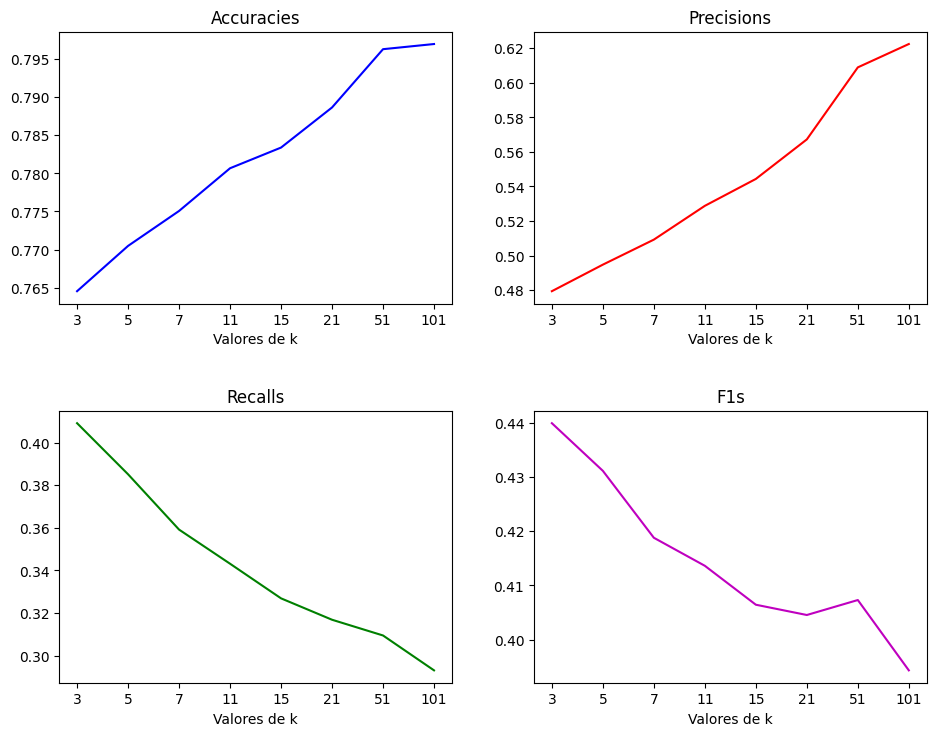

In [ ]:
#se grafican los resultados que se han obtenido para una mejor visualización
nparray=np.array(metricas1)
accs=[]
prec=[]
rec=[]
f1=[]
for i in k_values:
  subset=nparray[nparray[:, 0]==i]
  media_acc=np.mean(subset[:,1])
  media_prec=np.mean(subset[:,2])
  media_rec=np.mean(subset[:,3])
  media_f1=np.mean(subset[:,4])
  accs.append(media_acc)
  prec.append(media_prec)
  rec.append(media_rec)
  f1.append(media_f1)

x_labels = [str(val) for val in k_values]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(x_labels, accs, color='b')
axs[0, 0].set_title('Accuracies')
axs[0, 0].set_xticks(x_labels)
axs[0, 0].set_xlabel('Valores de k')

axs[0, 1].plot(x_labels, prec, color='r')
axs[0, 1].set_title('Precisions')
axs[0, 1].set_xticks(x_labels)
axs[0, 1].set_xlabel('Valores de k')

axs[1, 0].plot(x_labels, rec, color='g')
axs[1, 0].set_title('Recalls')
axs[1, 0].set_xticks(x_labels)
axs[1, 0].set_xlabel('Valores de k')

axs[1, 1].plot(x_labels, f1, color='m')
axs[1, 1].set_title('F1s')
axs[1, 1].set_xticks(x_labels)
axs[1, 1].set_xlabel('Valores de k')

plt.tight_layout(pad=3.0)
plt.show()

Como podemos ver en las gráficas, el algoritmo knn funciona mejor en la medida F1 con valores pequeños de k, que permiten mayor precisión y evitan que tienda a predecirse la clase mayoritaria. La accuracy aumenta al aumentar el valor de k, pero eso puede ser engañoso al tratarse de un dataset desbalanceado.

Por otro lado, como nos confirman los valores de las métricas, ya que los valores de accuracy son mayores que los de las demás mediciones, el dataset se encuentra bastante desbalanceado, existiendo más valores 0 de la variable objetivo que valores 1. Esto refuerza la elección de F1 como métrica clave a la hora de elegir el mejor modelo, ya que los resultados obtenidos en accuracy pueden ser engañosos.

Debido al desbalance y a que se obtienen resultados mejorables, se decidió modificar la manera en la que se dividían las particiones para intentar conseguir un mejor modelo. Para ello, en vez de las particiones manuales sobre el dataset mezclado, se utilizó StratifiedKFold para mantener la proporción global entre valores 0 y valores 1 de la variable de salida en cada partición

In [ ]:
# Lista de valores de k para validación interna
k_values = [3, 5, 7, 11, 15, 21, 51, 101]

#Obtenemos los datos del dataset completo
X = df_shuffled.drop(columns=["booleano"]) # Datos
y = df_shuffled["booleano"] # Etiqueta

#StratifiedKFold para validación externa
skf_external = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

results2 = []
metricas2 =[] # En esta variable se van a guardar los valores de las métricas de éxito alcanzadas por cada k

for train_idx, test_idx in skf_external.split(X, y):#Obtenemos los índices de los datos de cada partición

    x_train, x_test = X.iloc[train_idx], X.iloc[test_idx] #Obtenemos los datos de cada partición
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    #Variables para la validación interna
    best_k = None
    best_score = 0
    best_metrics = None

    for k in k_values:
        internal_scores = []
        internal_precisions = []
        internal_recalls = []
        internal_f1s = []

        #StratifiedKFold para validación interna
        skf_internal = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

        for train_int_idx, test_int_idx in skf_internal.split(x_train, y_train): #Obtenemos los índices de los datos de cada partición interna
            x_train_int, x_test_int = x_train.iloc[train_int_idx], x_train.iloc[test_int_idx]
            y_train_int, y_test_int = y_train.iloc[train_int_idx], y_train.iloc[test_int_idx]

            # Normalización
            train_int_norm, test_int_norm = normalizar(x_train_int, x_test_int)

            #Entrenamos el modelo con la k actual
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(train_int_norm, y_train_int)
            y_pred_int = knn.predict(test_int_norm)

            #Evaluamos métricas y las guardamos
            accuracy_int = accuracy_score(y_test_int, y_pred_int)
            precision_int = precision_score(y_test_int, y_pred_int, zero_division=0)
            recall_int = recall_score(y_test_int, y_pred_int, zero_division=0)
            f1_int = f1_score(y_test_int, y_pred_int, zero_division=0)

            internal_scores.append(accuracy_int)
            internal_precisions.append(precision_int)
            internal_recalls.append(recall_int)
            internal_f1s.append(f1_int)

        # Promediamos los resultados de todas las validaciones internas para este k
        mean_accuracy = np.mean(internal_scores)
        mean_precision = np.mean(internal_precisions)
        mean_recall = np.mean(internal_recalls)
        mean_f1 = np.mean(internal_f1s)

        metricas2.append([k,mean_accuracy,mean_precision,mean_recall,mean_f1])

        if mean_f1 > best_score:  #Seleccionamos el k con mejor f1 interna
            best_score = mean_f1
            best_k = k
            best_metrics = {
                "accuracy": mean_accuracy,
                "precision": mean_precision,
                "recall": mean_recall,
                "f1_score": mean_f1
            }

    print(f"\nTest interno: Mejor k = {best_k}")
    print(f"Métricas de validación interna -> Accuracy: {best_metrics['accuracy']:.4f}, Precision: {best_metrics['precision']:.4f}, Recall: {best_metrics['recall']:.4f}, F1: {best_metrics['f1_score']:.4f}")

    # Normalización de datos
    train_normal, test_normal = normalizar(x_train, x_test)

    # Entrenar modelo final con mejor k
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(train_normal, y_train)

    # Evaluar en test externo
    y_pred = knn.predict(test_normal)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"Métricas en test externo -> Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    results2.append({
        "best_k": best_k,
        "internal_accuracy": best_metrics["accuracy"],
        "internal_precision": best_metrics["precision"],
        "internal_recall": best_metrics["recall"],
        "internal_f1": best_metrics["f1_score"],
        "test_accuracy": accuracy,
        "test_precision": precision,
        "test_recall": recall,
        "test_f1": f1
    })

#Mostrar resultados finales
df_results2 = pd.DataFrame(results2)
print("\n\n")
df_results2




Test interno: Mejor k = 5
Métricas de validación interna -> Accuracy: 0.7870, Precision: 0.5404, Recall: 0.4172, F1: 0.4699
Métricas en test externo -> Accuracy: 0.7870, Precision: 0.5422, Recall: 0.4036, F1: 0.4627

Test interno: Mejor k = 3
Métricas de validación interna -> Accuracy: 0.7655, Precision: 0.4806, Recall: 0.4216, F1: 0.4489
Métricas en test externo -> Accuracy: 0.7625, Precision: 0.4722, Recall: 0.3812, F1: 0.4218

Test interno: Mejor k = 3
Métricas de validación interna -> Accuracy: 0.7757, Precision: 0.5075, Recall: 0.4731, F1: 0.4895
Métricas en test externo -> Accuracy: 0.7615, Precision: 0.4718, Recall: 0.4126, F1: 0.4402





,best_k,internal_accuracy,internal_precision,internal_recall,internal_f1,test_accuracy,test_precision,test_recall,test_f1
0,5,0.786961,0.540413,0.417250,0.469899,0.786952,0.542169,0.403587,0.462725
1,3,0.765546,0.480647,0.421573,0.448868,0.762487,0.472222,0.381166,0.421836
2,3,0.775739,0.507460,0.473094,0.489461,0.761468,0.471795,0.412556,0.440191


Con StratifiedKFold k = 3 y k = 5 siguen siendo los parámetros con mejores resultados

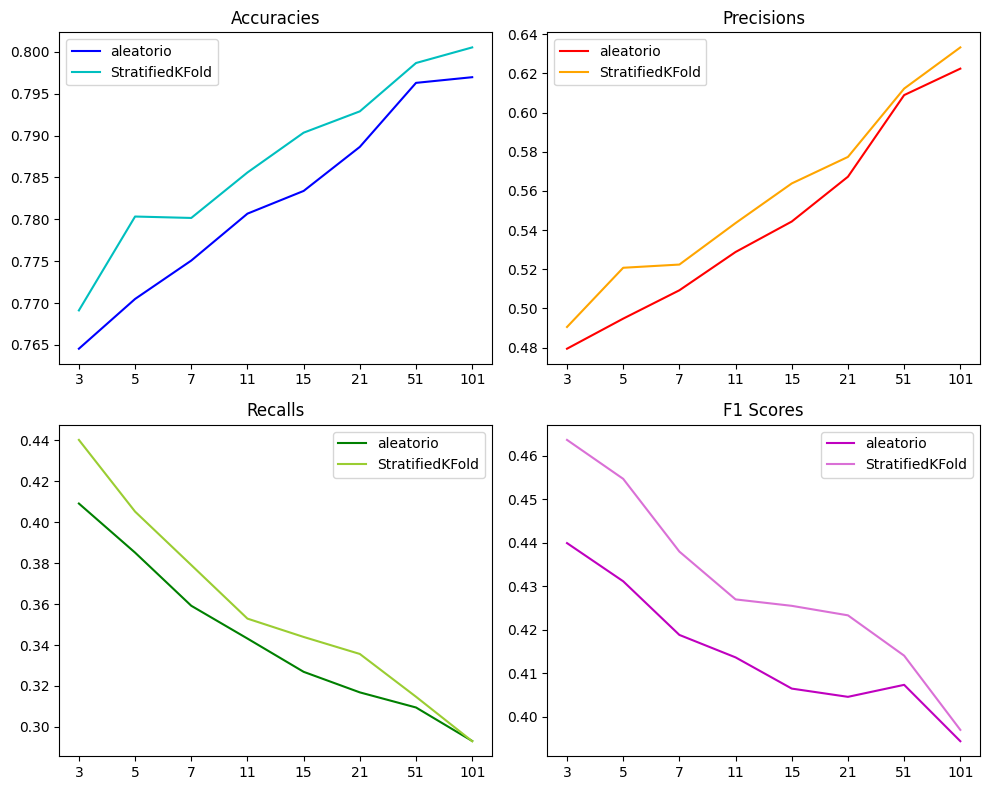

In [ ]:
nparray=np.array(metricas1)
nparray2=np.array(metricas2)

accs = []
prec = []
rec = []
f1 = []

accs2 = []
prec2 = []
rec2 = []
f1_2 = []

for i in k_values:
    #Resultados iniciales
    subset=nparray[nparray[:, 0]==i]
    media_acc=np.mean(subset[:,1])
    media_prec=np.mean(subset[:,2])
    media_rec=np.mean(subset[:,3])
    media_f1=np.mean(subset[:,4])
    accs.append(media_acc)
    prec.append(media_prec)
    rec.append(media_rec)
    f1.append(media_f1)

    #Resultados stratifiedkfold
    subset2=nparray2[nparray2[:, 0]==i]
    media_acc_2=np.mean(subset2[:,1])
    media_prec_2=np.mean(subset2[:,2])
    media_rec_2=np.mean(subset2[:,3])
    media_f1_2=np.mean(subset2[:,4])
    accs2.append(media_acc_2)
    prec2.append(media_prec_2)
    rec2.append(media_rec_2)
    f1_2.append(media_f1_2)

x_labels = [str(val) for val in k_values]
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(x_labels, accs, marker='', color='b', label='aleatorio')
axs[0, 0].plot(x_labels, accs2, marker='', color='c', label='StratifiedKFold')
axs[0, 0].set_title('Accuracies')
axs[0, 0].set_xticks(x_labels)
axs[0, 0].legend()

axs[0, 1].plot(x_labels, prec, marker='', color='r', label='aleatorio')
axs[0, 1].plot(x_labels, prec2, marker='', color='orange', label='StratifiedKFold')
axs[0, 1].set_title('Precisions')
axs[0, 1].set_xticks(x_labels)
axs[0, 1].legend()

axs[1, 0].plot(x_labels, rec, marker='', color='g', label='aleatorio')
axs[1, 0].plot(x_labels, rec2, marker='', color='yellowgreen', label='StratifiedKFold')
axs[1, 0].set_title('Recalls')
axs[1, 0].set_xticks(x_labels)
axs[1, 0].legend()

axs[1, 1].plot(x_labels, f1, marker='', color='m', label='aleatorio')
axs[1, 1].plot(x_labels, f1_2, marker='', color='orchid', label='StratifiedKFold')
axs[1, 1].set_title('F1 Scores')
axs[1, 1].set_xticks(x_labels)
axs[1, 1].legend()

plt.tight_layout()
plt.show()

Como podemos ver, las tendencias se mantienen, pero todos los resultados utilizando StratifiedKFold son mejores que con particiones aleatorias, por lo que utilizaremos este método en el resto de modelos

### Regresión logística

Para regresión logística, los parámetros que ajustaremos son penalty y C, que se usan para regularizar los coeficientes de regresión. Dado que el resto de parámetros toman los valores por defecto, el optimizador utilizado es lbfgs, que solo permite penalty 'l2' y 'None', por lo que serán los valores a probar. Para el valor de penalty None, no se aplica ninguna regularización por lo que el valor de C es indiferente.

Para los valores de C, que se combinarán con l2 y definen la intensidad de la regularización, en la que un C bajo implica mayor regularización, se probaron los valores en un rango de 0.01 a 1000.


In [ ]:
# Lista de valores de C y tipos de penalty para validación interna
penalty_types = [None, 'l2']
c_values = [0.01, 0.1, 1, 10, 100, 1000]

#Obtenemos los datos del dataset completo
X = df_shuffled.drop(columns=["booleano"]) # Datos
y = df_shuffled["booleano"] # Etiqueta

#StratifiedKFold para validación externa
skf_external = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

results3 = []
metricas_l2 = []
metricas_none = []

for train_idx, test_idx in skf_external.split(X, y):#Obtenemos los índices de los datos de cada partición

    x_train, x_test = X.iloc[train_idx], X.iloc[test_idx] #Obtenemos los datos de cada partición
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    #Variables para la validación interna
    best_param = None
    best_score = 0
    best_hyperparams = None

    for penalty in penalty_types:
      if penalty is None: #Si penalty es None no importa el valor de C, por lo que no hay que hacer un bucle con sus valores
        internal_scores = []
        internal_precisions = []
        internal_recalls = []
        internal_f1s = []

        #StratifiedKFold para validación interna
        skf_internal = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

        for train_int_idx, test_int_idx in skf_internal.split(x_train, y_train): #Obtenemos los índices de los datos de cada partición interna
            x_train_int, x_test_int = x_train.iloc[train_int_idx], x_train.iloc[test_int_idx]
            y_train_int, y_test_int = y_train.iloc[train_int_idx], y_train.iloc[test_int_idx]

            # Normalización
            train_int_norm, test_int_norm = normalizar(x_train_int, x_test_int)

            # Entrenar modelo de regresión logística
            model = LogisticRegression(penalty=penalty)
            model.fit(train_int_norm, y_train_int)
            y_pred_int = model.predict(test_int_norm)

            #Evaluamos métricas y las guardamos
            accuracy_int = accuracy_score(y_test_int, y_pred_int)
            precision_int = precision_score(y_test_int, y_pred_int, zero_division=0)
            recall_int = recall_score(y_test_int, y_pred_int, zero_division=0)
            f1_int = f1_score(y_test_int, y_pred_int, zero_division=0)

            internal_scores.append(accuracy_int)
            internal_precisions.append(precision_int)
            internal_recalls.append(recall_int)
            internal_f1s.append(f1_int)

        # Promediamos los resultados de todas las validaciones internas para esta combinación de parámetros
        mean_accuracy = np.mean(internal_scores)
        mean_precision = np.mean(internal_precisions)
        mean_recall = np.mean(internal_recalls)
        mean_f1 = np.mean(internal_f1s)

        metricas_none.append([mean_accuracy,mean_precision,mean_recall,mean_f1])

        if mean_f1 > best_score:
            best_score = mean_f1
            best_c = None  #Valor sin importancia
            best_penalty = penalty
            best_metrics = {
                "accuracy": mean_accuracy,
                "precision": mean_precision,
                "recall": mean_recall,
                "f1_score": mean_f1
            }
      else:
        for c in c_values:
          internal_scores = []
          internal_precisions = []
          internal_recalls = []
          internal_f1s = []

          #StratifiedKFold para validación interna
          skf_internal = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

          for train_int_idx, test_int_idx in skf_internal.split(x_train, y_train): #Obtenemos los índices de los datos de cada partición interna
              x_train_int, x_test_int = x_train.iloc[train_int_idx], x_train.iloc[test_int_idx]
              y_train_int, y_test_int = y_train.iloc[train_int_idx], y_train.iloc[test_int_idx]

              # Normalización
              train_int_norm, test_int_norm = normalizar(x_train_int, x_test_int)

              # Entrenar modelo de regresión logística
              model = LogisticRegression(penalty=penalty, C=c)
              model.fit(train_int_norm, y_train_int)
              y_pred_int = model.predict(test_int_norm)

              #Evaluamos métricas y las guardamos
              accuracy_int = accuracy_score(y_test_int, y_pred_int)
              precision_int = precision_score(y_test_int, y_pred_int, zero_division=0)
              recall_int = recall_score(y_test_int, y_pred_int, zero_division=0)
              f1_int = f1_score(y_test_int, y_pred_int, zero_division=0)

              internal_scores.append(accuracy_int)
              internal_precisions.append(precision_int)
              internal_recalls.append(recall_int)
              internal_f1s.append(f1_int)

          # Promediamos los resultados de todas las validaciones internas para esta combinación de parámetros
          mean_accuracy = np.mean(internal_scores)
          mean_precision = np.mean(internal_precisions)
          mean_recall = np.mean(internal_recalls)
          mean_f1 = np.mean(internal_f1s)

          metricas_l2.append([c,mean_accuracy,mean_precision,mean_recall,mean_f1])

          if mean_f1 > best_score:
              best_score = mean_f1
              best_c = c
              best_penalty = penalty
              best_metrics = {
                  "accuracy": mean_accuracy,
                  "precision": mean_precision,
                  "recall": mean_recall,
                  "f1_score": mean_f1
              }

    print(f"\nTest interno: Mejor C = {best_c}, Mejor penalty = {best_penalty}")
    print(f"Métricas de validación interna -> Accuracy: {best_metrics['accuracy']:.4f}, Precision: {best_metrics['precision']:.4f}, Recall: {best_metrics['recall']:.4f}, F1: {best_metrics['f1_score']:.4f}")

    # Normalización de datos
    train_normal, test_normal = normalizar(x_train, x_test)

    # Entrenar modelo final con los mejores hiperparámetros
    if best_c == None:
      model = LogisticRegression(penalty=best_penalty)
    else:
      model = LogisticRegression(penalty=best_penalty, C=best_c)
    model.fit(train_normal, y_train)

    # Evaluar en test externo
    y_pred = model.predict(test_normal)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"Métricas en test externo -> Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    results3.append({
        "best_c": best_c,
        "best_penalty": best_penalty,
        "internal_accuracy": best_metrics["accuracy"],
        "internal_precision": best_metrics["precision"],
        "internal_recall": best_metrics["recall"],
        "internal_f1": best_metrics["f1_score"],
        "test_accuracy": accuracy,
        "test_precision": precision,
        "test_recall": recall,
        "test_f1": f1
    })

# Mostrar resultados finales
df_results3 = pd.DataFrame(results3)
print("\n\n")
df_results3


Test interno: Mejor C = None, Mejor penalty = None
Métricas de validación interna -> Accuracy: 0.7936, Precision: 0.5865, Recall: 0.3229, F1: 0.4158
Métricas en test externo -> Accuracy: 0.7982, Precision: 0.6016, Recall: 0.3318, F1: 0.4277

Test interno: Mejor C = None, Mejor penalty = None
Métricas de validación interna -> Accuracy: 0.7931, Precision: 0.5867, Recall: 0.2893, F1: 0.3855
Métricas en test externo -> Accuracy: 0.7961, Precision: 0.6075, Recall: 0.2915, F1: 0.3939

Test interno: Mejor C = None, Mejor penalty = None
Métricas de validación interna -> Accuracy: 0.7880, Precision: 0.5640, Recall: 0.3206, F1: 0.4072
Métricas en test externo -> Accuracy: 0.8012, Precision: 0.6045, Recall: 0.3632, F1: 0.4538





,best_c,best_penalty,internal_accuracy,internal_precision,internal_recall,internal_f1,test_accuracy,test_precision,test_recall,test_f1
0,None,None,0.793573,0.586532,0.322917,0.415792,0.798165,0.601626,0.331839,0.427746
1,None,None,0.793069,0.586654,0.289274,0.385516,0.796126,0.607477,0.291480,0.393939
2,None,None,0.787973,0.563973,0.320604,0.407229,0.801223,0.604478,0.363229,0.453782


Los mejores resultados se obtienen cuando penalty (tipo de regularización que se aplica al modelo para evitar sobreajuste) es None. En ese caso, el valor del parámetro C no influye en los resultados, ya que este es el que controla la intensidad de la regularización. Dado que penalty None es seleccionado en todas las validaciones internas, lo seleccionamos como el mejor para este método.

A continuación mostraremos también las métricas medias obtenidas en las validaciones internas para todos los parámetros, para aumentar el análisis y buscar tendencias en los resultados obtenidos.

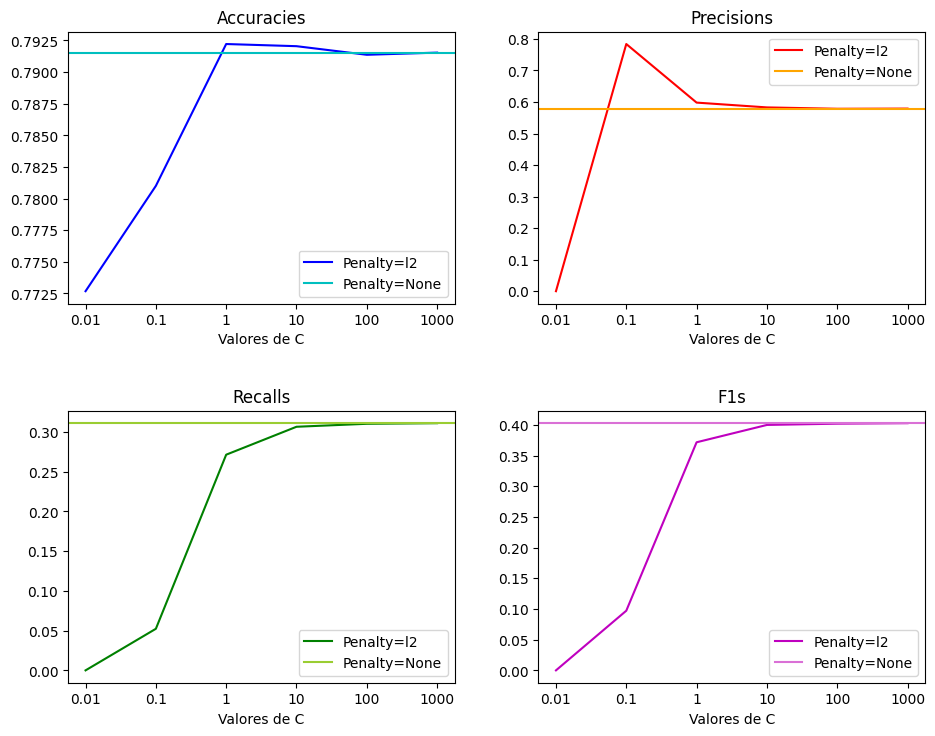

In [ ]:
#se grafican los resultados que se han obtenido para una mejor visualización
nparray=np.array(metricas_l2)

accs=[]
prec=[]
rec=[]
f1=[]
for i in c_values:
  subset=nparray[nparray[:, 0]==i]
  media_acc=np.mean(subset[:,1])
  media_prec=np.mean(subset[:,2])
  media_rec=np.mean(subset[:,3])
  media_f1=np.mean(subset[:,4])
  accs.append(media_acc)
  prec.append(media_prec)
  rec.append(media_rec)
  f1.append(media_f1)

nparray2=np.array(metricas_none)
media = np.mean(nparray2, axis=0)

x_labels = [str(val) for val in c_values]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(x_labels, accs, color='b',  label='Penalty=l2')
axs[0, 0].axhline(y=media[0], color='c',  label='Penalty=None')
axs[0, 0].set_title('Accuracies')
axs[0, 0].set_xticks(x_labels)
axs[0, 0].set_xlabel('Valores de C')
axs[0, 0].legend()

axs[0, 1].plot(x_labels, prec, color='r',  label='Penalty=l2')
axs[0, 1].axhline(y=media[1], color='orange',  label='Penalty=None')
axs[0, 1].set_title('Precisions')
axs[0, 1].set_xticks(x_labels)
axs[0, 1].set_xlabel('Valores de C')
axs[0, 1].legend()

axs[1, 0].plot(x_labels, rec, color='g',  label='Penalty=l2')
axs[1, 0].axhline(y=media[2], color='Yellowgreen',  label='Penalty=None')
axs[1, 0].set_title('Recalls')
axs[1, 0].set_xticks(x_labels)
axs[1, 0].set_xlabel('Valores de C')
axs[1, 0].legend()

axs[1, 1].plot(x_labels, f1, color='m',  label='Penalty=l2')
axs[1, 1].axhline(y=media[3], color='orchid',  label='Penalty=None')
axs[1, 1].set_title('F1s')
axs[1, 1].set_xticks(x_labels)
axs[1, 1].set_xlabel('Valores de C')
axs[1, 1].legend()

plt.tight_layout(pad=3.0)
plt.show()

Como podemos ver, en casi todas las combinaciones de C y la penalty l2 se obtienen peores métricas que con penalty None. También se puede ver como las metricas mejoran al aumentar C, lo cual tiene sentido porque significa que se aplica una regularización más débil y por lo tanto se asemeja más a penalty None

### Árboles de decisión

Para árboles de decisión se ajustarán max depth, min samples split y min samples leaf.

Max depth limita la profundidad máxima del árbol de decisión (None indica que no hay límite), lo cual hace que a valores más pequeños el árbol sea más simple. Min samples split indica el número mínimo de muestras que se necesitan para que se realice una división en un nodo, lo cual hace que a valores más grandes el árbol sea más restrictivo al haber menos divisiones. Min samples leaf controla el número mínimo de muestras que debe tener un nodo hoja, lo cual hace que a valores más grandes el árbol esté más generalizado.

Se probarán diversas combinaciones de estos parámetros para evaluar su rendimiento.

In [ ]:
# Lista de valores de hiperparámetros para validación interna
max_depth_values = [3, 5, 10, 15, None]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 5]

#Obtenemos los datos del dataset completo
X = df_shuffled.drop(columns=["booleano"]) # Datos
y = df_shuffled["booleano"] # Etiqueta

#StratifiedKFold para validación externa
skf_external = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

results4 = []
metricas3 = []

for train_idx, test_idx in skf_external.split(X, y):#Obtenemos los índices de los datos de cada partición

    x_train, x_test = X.iloc[train_idx], X.iloc[test_idx] #Obtenemos los datos de cada partición
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    #Variables para la validación interna
    best_hyperparams = None
    best_score = 0
    best_metrics = None

    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for min_samples_leaf in min_samples_leaf_values:
                internal_scores = []
                internal_precisions = []
                internal_recalls = []
                internal_f1s = []

                #StratifiedKFold para validación interna
                skf_internal = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

                for train_int_idx, test_int_idx in skf_internal.split(x_train, y_train): #Obtenemos los índices de los datos de cada partición interna
                    x_train_int, x_test_int = x_train.iloc[train_int_idx], x_train.iloc[test_int_idx]
                    y_train_int, y_test_int = y_train.iloc[train_int_idx], y_train.iloc[test_int_idx]

                    train_int_norm, test_int_norm = normalizar(x_train_int, x_test_int)

                    # Entrenar modelo de árbol de decisión
                    model = DecisionTreeClassifier(
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf
                    )
                    model.fit(train_int_norm, y_train_int)
                    y_pred_int = model.predict(test_int_norm)

                    #Evaluamos métricas y las guardamos
                    internal_scores.append(accuracy_score(y_test_int, y_pred_int))
                    internal_precisions.append(precision_score(y_test_int, y_pred_int, zero_division=0))
                    internal_recalls.append(recall_score(y_test_int, y_pred_int, zero_division=0))
                    internal_f1s.append(f1_score(y_test_int, y_pred_int, zero_division=0))

                # Promediamos los resultados
                mean_accuracy = np.mean(internal_scores)
                mean_precision = np.mean(internal_precisions)
                mean_recall = np.mean(internal_recalls)
                mean_f1 = np.mean(internal_f1s)

                metricas3.append([max_depth,min_samples_split,min_samples_leaf,mean_accuracy,mean_precision,mean_recall,mean_f1])

                if mean_f1 > best_score:
                    best_score = mean_f1
                    best_hyperparams = (max_depth, min_samples_split, min_samples_leaf)
                    best_metrics = {
                        "accuracy": mean_accuracy,
                        "precision": mean_precision,
                        "recall": mean_recall,
                        "f1_score": mean_f1
                    }

    print(f"\nTest interno: Mejor max_depth = {best_hyperparams[0]}, min_samples_split = {best_hyperparams[1]}, min_samples_leaf = {best_hyperparams[2]}")
    print(f"Métricas de validación interna -> Accuracy: {best_metrics['accuracy']:.4f}, Precision: {best_metrics['precision']:.4f}, Recall: {best_metrics['recall']:.4f}, F1: {best_metrics['f1_score']:.4f}")


    # Normalización de datos
    train_normal, test_normal = normalizar(x_train, x_test)

    # Entrenar modelo final con los mejores hiperparámetros
    model = DecisionTreeClassifier(
        max_depth=best_hyperparams[0],
        min_samples_split=best_hyperparams[1],
        min_samples_leaf=best_hyperparams[2]
    )
    model.fit(train_normal, y_train)

    # Evaluar en test externo
    y_pred = model.predict(test_normal)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"Métricas en test externo -> Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    results4.append({
        "best_max_depth": best_hyperparams[0],
        "best_min_samples_split": best_hyperparams[1],
        "best_min_samples_leaf": best_hyperparams[2],
        "internal_accuracy": best_metrics["accuracy"],
        "internal_precision": best_metrics["precision"],
        "internal_recall": best_metrics["recall"],
        "internal_f1": best_metrics["f1_score"],
        "test_accuracy": accuracy,
        "test_precision": precision,
        "test_recall": recall,
        "test_f1": f1
    })

# Mostrar resultados finales
df_results4 = pd.DataFrame(results4)
print("\n\n")
df_results4



Test interno: Mejor max_depth = 5, min_samples_split = 5, min_samples_leaf = 2
Métricas de validación interna -> Accuracy: 0.7824, Precision: 0.5249, Recall: 0.4622, F1: 0.4885
Métricas en test externo -> Accuracy: 0.7727, Precision: 0.5000, Recall: 0.4439, F1: 0.4703

Test interno: Mejor max_depth = None, min_samples_split = 10, min_samples_leaf = 1
Métricas de validación interna -> Accuracy: 0.7548, Precision: 0.4590, Recall: 0.4127, F1: 0.4332
Métricas en test externo -> Accuracy: 0.7329, Precision: 0.4076, Recall: 0.3857, F1: 0.3963

Test interno: Mejor max_depth = 15, min_samples_split = 5, min_samples_leaf = 5
Métricas de validación interna -> Accuracy: 0.7757, Precision: 0.5118, Recall: 0.4081, F1: 0.4526
Métricas en test externo -> Accuracy: 0.7452, Precision: 0.4395, Recall: 0.4395, F1: 0.4395





,best_max_depth,best_min_samples_split,best_min_samples_leaf,internal_accuracy,internal_precision,internal_recall,internal_f1,test_accuracy,test_precision,test_recall,test_f1
0,5.0,5,2,0.782365,0.524904,0.462154,0.488481,0.772681,0.500000,0.443946,0.470309
1,NaN,10,1,0.754837,0.458962,0.412665,0.433249,0.732926,0.407583,0.385650,0.396313
2,15.0,5,5,0.775728,0.511765,0.408140,0.452610,0.745158,0.439462,0.439462,0.439462


En este caso, los parámetros obtenidos en cada validación interna difieren considerablemente entre sí, por lo que podemos concluir que no existe una única combinación que produzca los mejores resultados en todos los casos, aunque en vista de los datos presentes se comenzará seleccionando la combinación max_depth = 5, min_samples_split = 5 y min_samples_leaf = 2, al ser la de mayor rendimiento en comparativa con los otros tests externos.

A continuación mostraremos también las métricas medias obtenidas en las validaciones internas para todos los parámetros, para aumentar el análisis y buscar tendencias en los resultados obtenidos.

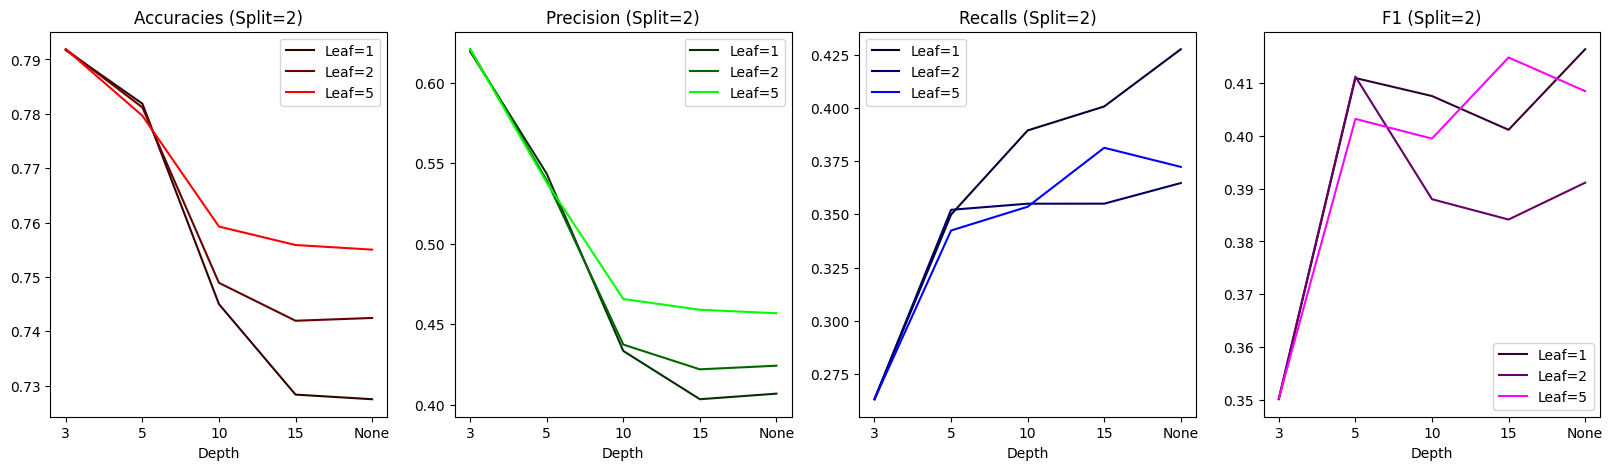

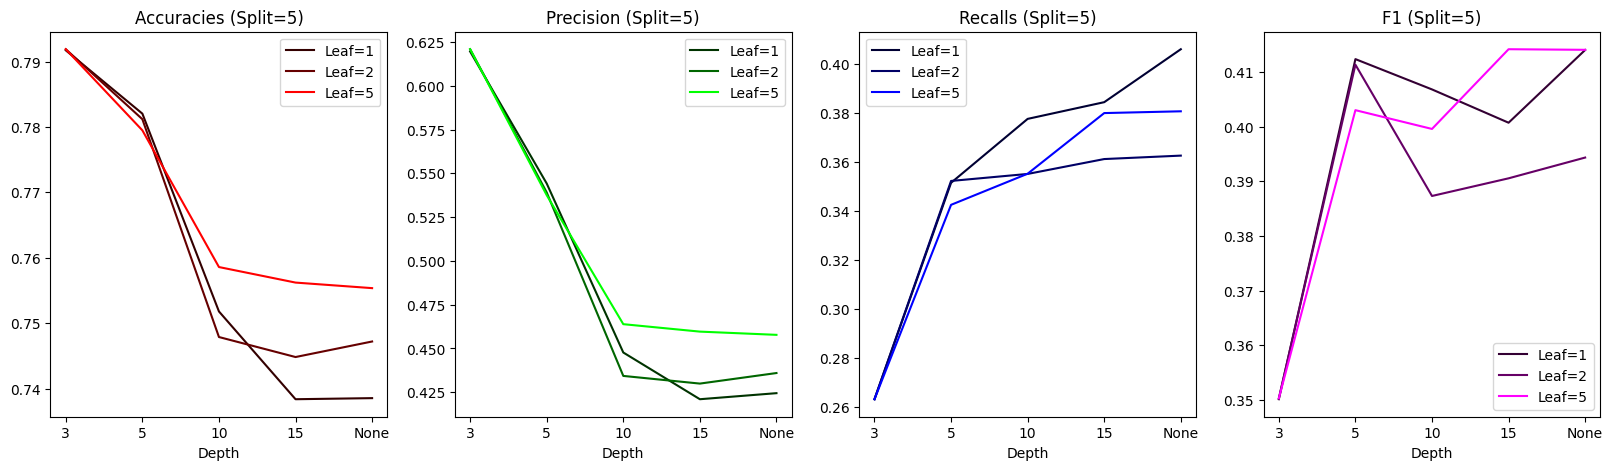

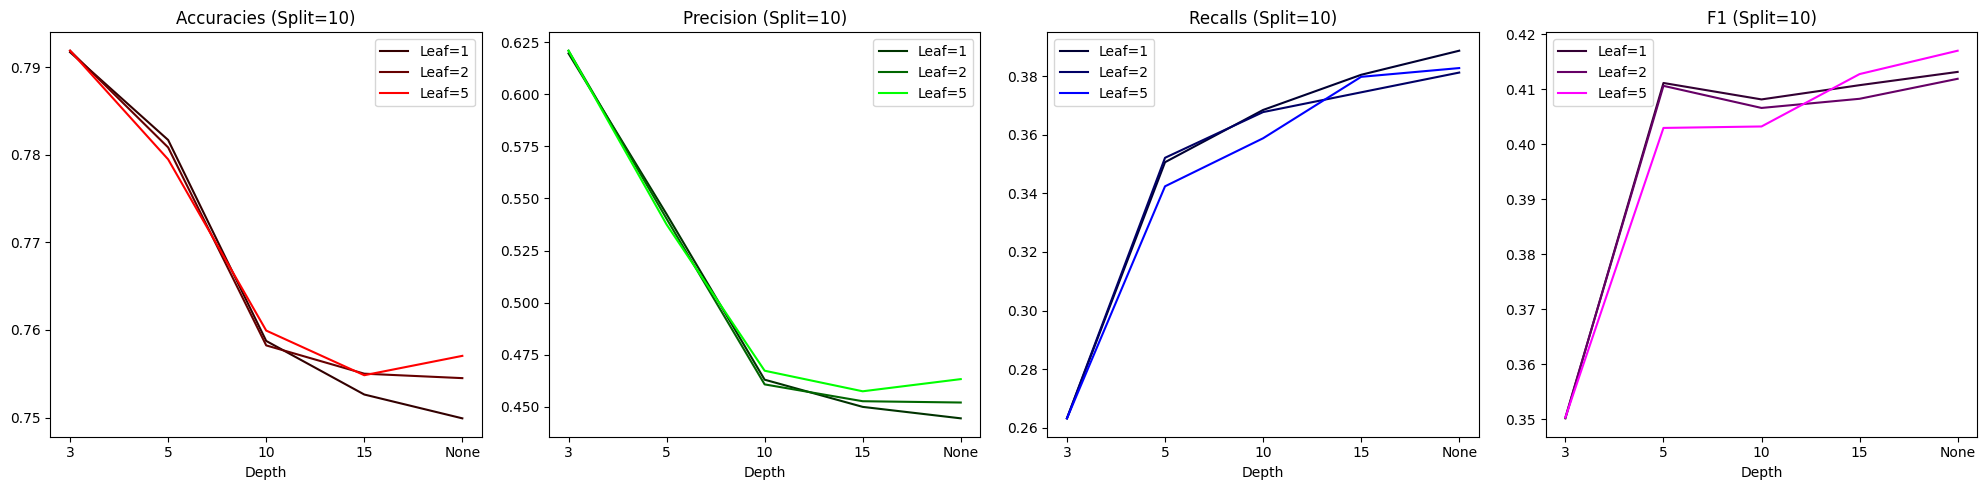

In [ ]:
#graficación de resultados
datos=np.array(metricas3)
dfmetricas=pd.DataFrame(datos,columns=['depth','split','leaf','acc','prec','rec','f1'])
dfmetricas['depth'] = dfmetricas['depth'].fillna('None')
df_mean = dfmetricas.groupby(['depth', 'split', 'leaf'], as_index=False, sort=False).mean()
split = [str(val) for val in min_samples_split_values]
leaf = [str(val) for val in min_samples_leaf_values]
depth =[str(val) for val in max_depth_values]

for i in split:
  df_ausar=df_mean[df_mean['split']==float(i)]
  fig, axs = plt.subplots(1, 4, figsize=(20, 5))
  for j in leaf:
    df_grafica=df_ausar[df_ausar['leaf']==float(j)]
    axs[0].plot(depth, df_grafica['acc'], marker='', color=(float(j)/max(min_samples_leaf_values), 0, 0), label=f'Leaf={j}')
    axs[1].plot(depth, df_grafica['prec'], marker='', color=(0,float(j)/max(min_samples_leaf_values), 0), label=f'Leaf={j}')
    axs[2].plot(depth, df_grafica['rec'], marker='', color=(0, 0,float(j)/max(min_samples_leaf_values)), label=f'Leaf={j}')
    axs[3].plot(depth, df_grafica['f1'], marker='', color=(float(j)/max(min_samples_leaf_values), 0,float(j)/max(min_samples_leaf_values)), label=f'Leaf={j}')
  axs[0].legend()
  axs[1].legend()
  axs[2].legend()
  axs[3].legend()
  axs[0].set_xlabel('Depth')
  axs[1].set_xlabel('Depth')
  axs[2].set_xlabel('Depth')
  axs[3].set_xlabel('Depth')
  axs[0].set_title(f'Accuracies (Split={i})')
  axs[1].set_title(f'Precision (Split={i})')
  axs[2].set_title(f'Recalls (Split={i})')
  axs[3].set_title(f'F1 (Split={i})')

plt.tight_layout()
plt.show()

Debido a lo visto en las gráficas, podemos deducir que el valor 3 para max_depth produce los peores resultados en la medida F1. Sin embargo, el aumento de este valor no siempre implica un mejor rendimiento, ya que se producen oscilaciones al combinarlo con algunos valores de min_samples_leaf y min_samples_split. Aunque se refleje en gráficas diferentes, también se puede intuir que el valor de min_samples_split no parece influir demasiado en el rendimiento, ya que las escalas en las gráficas de sus distintos valores son casi iguales y las líneas siguen una disposición similar. Aunque los resultados respecto a min_samples_leaf parezcan diferenciarse claramente entre sus distintos valores, no existe ninguno de ellos que destaque frente al resto en todas las combinaciones con los demás parámetros.

Por todo esto, nos parece que la decisión de elegir la combinación con mejor rendimiento en su test externo como mejor modelo es la adecuada.

### Perceptrón multicapa

Para perceptrón multicapa se ajustarán hidden_layer_sizes, learning_rate_init y max_iter. El parámetro más interesante es hidden_layer_sizes, que define el número de neuronas de las capas ocultas. Se probarán capas de 50 a 800 neuronas y perceptrones de hasta 3 capas para evaluar qué configuración de arquitectura tiene mejor rendimiento.
Asimismo se van a modificar levemente valores como el learning_rate_init, que modifica la inicialización de la variable de aprendizaje (esto es, para valores menores converge mucho más despacio pero de modo más estable), o el valor de las iteraciones máximas que el modelo va a hacer en el intento de converger.

In [ ]:
metricas=[]
#separacion de datos entre dataset y booleano
X = df_shuffled.drop(columns=["booleano"])
y = df_shuffled["booleano"]

#hiperparámetros a usar, se centra mayoritariamente en el hidden_layer_sizes antes que el learning rate y max iter como sugiere el enunciado
#número de neuronas en las capas no terminales
hiddenlayer_values  = [ (50,), (100,), (200,), (400,), (800,), (100, 50), (200, 100), (400, 200), (100, 50, 25),(200,100,50)]    #valor predeterminado 100
learningrate_values = [0.001,0.005,0.01]  #valor predeterminado 0.001
maxiter_values      = [200,400,800]   #valor predeterminado 200

#tres particiones de validación externa usando el kfold
skf_external = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
results = []
#realiza las tres iteraciones principales
for train_idx, test_idx in skf_external.split(X, y):
  x_train, x_test = X.iloc[train_idx], X.iloc[test_idx]
  y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

  best_hyperparams = None
  best_score = 0
  best_metrics = None


  #se itera por cada posible combinación de hiperparametros
  for hiddenlayer in hiddenlayer_values:
    for learningrate in learningrate_values:
      for maxiters in maxiter_values:
        internal_scores = []
        internal_precisions = []
        internal_recalls = []
        internal_f1s = []
        #se hacen las particiones internas
        skf_internal = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
        converged=1
        for train_int_idx, test_int_idx in skf_internal.split(x_train, y_train): #Obtenemos los índices de los datos de cada partición interna
          x_train_int, x_test_int = x_train.iloc[train_int_idx], x_train.iloc[test_int_idx]
          y_train_int, y_test_int = y_train.iloc[train_int_idx], y_train.iloc[test_int_idx]

          #normalización de datos (uno)
          train_int_norm, test_int_norm = normalizar(x_train_int, x_test_int)

          #se entrena y ejecuta el predictor como tal
          model = MLPClassifier(hidden_layer_sizes=hiddenlayer,learning_rate_init=learningrate,max_iter=maxiters).fit(train_int_norm, y_train_int)
          if model.n_iter_ >= model.max_iter:
            converged=converged*0
          y_pred_int = model.predict(test_int_norm)

          #se guardan las variables parciales
          internal_scores.append(accuracy_score(y_test_int, y_pred_int))
          internal_precisions.append(precision_score(y_test_int, y_pred_int, zero_division=0))
          internal_recalls.append(recall_score(y_test_int, y_pred_int, zero_division=0))
          internal_f1s.append(f1_score(y_test_int, y_pred_int, zero_division=0))

        #se saca la media para la combinación de valores
        mean_accuracy = np.mean(internal_scores)
        mean_precision = np.mean(internal_precisions)
        mean_recall = np.mean(internal_recalls)
        mean_f1 = np.mean(internal_f1s)

        metricas.append([hiddenlayer,learningrate,maxiters,mean_accuracy,mean_precision,mean_recall,mean_f1,converged])
        if mean_f1 > best_score:
          best_score = mean_f1
          best_hyperparams = (hiddenlayer, learningrate, maxiters)
          best_metrics = {"accuracy": mean_accuracy,"precision": mean_precision,"recall": mean_recall,"f1_score": mean_f1}

  print(f"\nTest interno: Mejor hidden_layer_sizes = {best_hyperparams[0]}, learning_rate_init = {best_hyperparams[1]}, max_iter = {best_hyperparams[2]}")
  print(f"Métricas de validación interna -> Accuracy: {best_metrics['accuracy']:.4f}, Precision: {best_metrics['precision']:.4f}, Recall: {best_metrics['recall']:.4f}, F1: {best_metrics['f1_score']:.4f}")


  #normalización de datos (uno)
  train_normal, test_normal = normalizar(x_train, x_test)

  # Entrenar modelo final con los mejores hiperparámetros
  #se entrena y ejecuta el predictor
  model = MLPClassifier(hidden_layer_sizes=best_hyperparams[0],learning_rate_init=best_hyperparams[1],max_iter=best_hyperparams[2]).fit(train_normal, y_train)
  y_pred= model.predict(test_normal)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, zero_division=0)
  recall = recall_score(y_test, y_pred, zero_division=0)
  f1 = f1_score(y_test, y_pred, zero_division=0)

  print(f"Métricas en test externo -> Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

  results.append({
        "best hidden_layer_sizes": best_hyperparams[0],
        "best learning_rate_init": best_hyperparams[1],
        "best max_iter": best_hyperparams[2],
        "internal_accuracy": best_metrics["accuracy"],
        "internal_precision": best_metrics["precision"],
        "internal_recall": best_metrics["recall"],
        "internal_f1": best_metrics["f1_score"],
        "test_accuracy": accuracy,
        "test_precision": precision,
        "test_recall": recall,
        "test_f1": f1
  })

df_results = pd.DataFrame(results)
print("\n\n")
df_results


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro


Test interno: Mejor max_depth = (800,), min_samples_split = 0.005, min_samples_leaf = 400
Métricas de validación interna -> Accuracy: 0.7987, Precision: 0.5857, Recall: 0.4123, F1: 0.4800
Métricas en test externo -> Accuracy: 0.7890, Precision: 0.5690, Recall: 0.2960, F1: 0.3894


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro


Test interno: Mejor max_depth = (200, 100), min_samples_split = 0.01, min_samples_leaf = 200
Métricas de validación interna -> Accuracy: 0.7890, Precision: 0.5586, Recall: 0.3699, F1: 0.4375
Métricas en test externo -> Accuracy: 0.8114, Precision: 0.6218, Recall: 0.4350, F1: 0.5119


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro


Test interno: Mejor max_depth = (100,), min_samples_split = 0.01, min_samples_leaf = 200
Métricas de validación interna -> Accuracy: 0.8033, Precision: 0.6043, Recall: 0.4014, F1: 0.4811
Métricas en test externo -> Accuracy: 0.7849, Precision: 0.5294, Recall: 0.4843, F1: 0.5059





,best hidden_layer_sizes,best learning_rate_init,best max_iter,internal_accuracy,internal_precision,internal_recall,internal_f1,test_accuracy,test_precision,test_recall,test_f1
0,"(800,)",0.005,400,0.798682,0.585678,0.412343,0.479968,0.788991,0.568966,0.295964,0.389381
1,"(200, 100)",0.010,200,0.789001,0.558636,0.369912,0.437493,0.811417,0.621795,0.434978,0.511873
2,"(100,)",0.010,200,0.803264,0.604272,0.401384,0.481124,0.784913,0.529412,0.484305,0.505855


Debido a que se combinan valores de iteraciones bajas con aprendizajes también bajos, muchos de ellos no llegan a converger y dar predictores estables (lo que explica los warnings de no convergencia).
A pesar de que el perceptron no obtiene valores especialmente malos en comparación con el resto de algoritmos, parece mucho más inestable que el resto de modelos probados, como se mostrará a continuación.

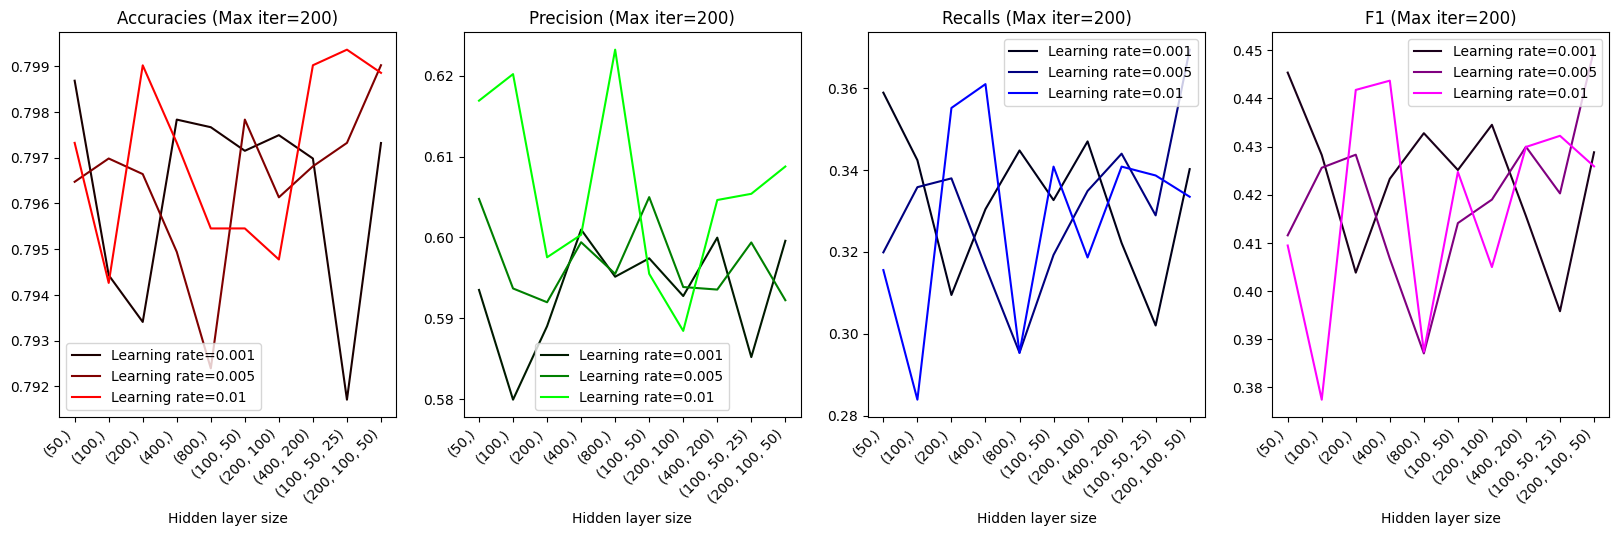

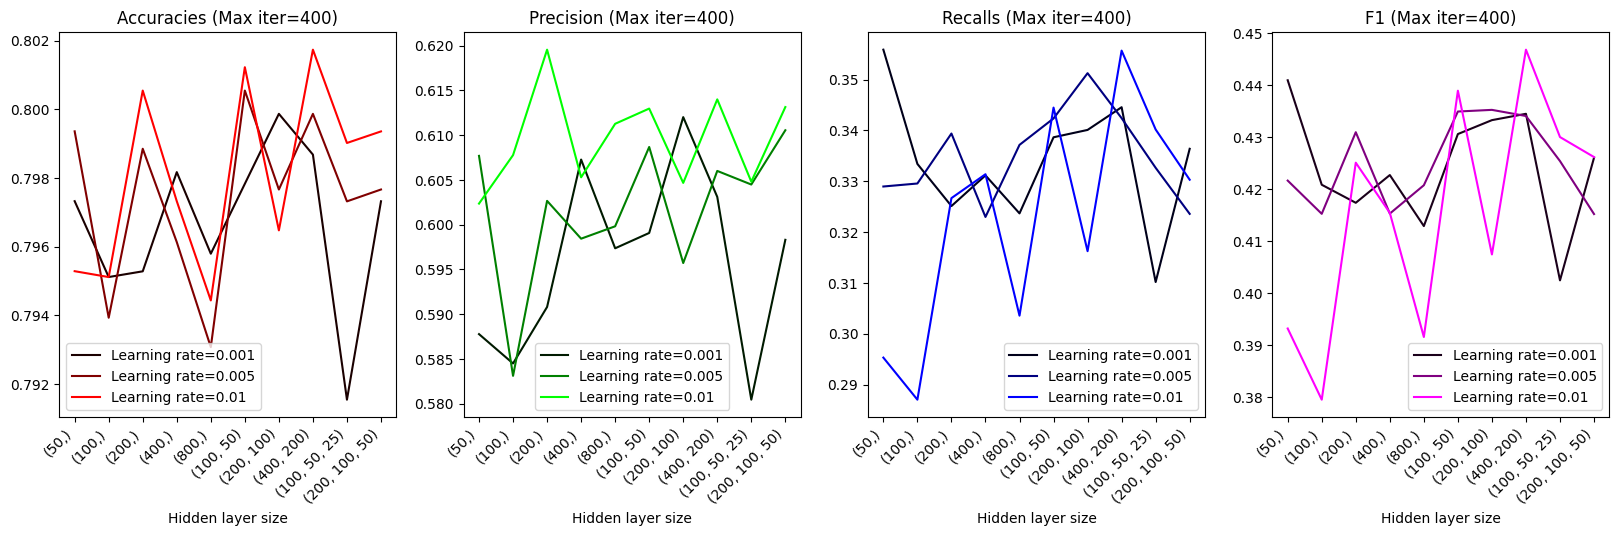

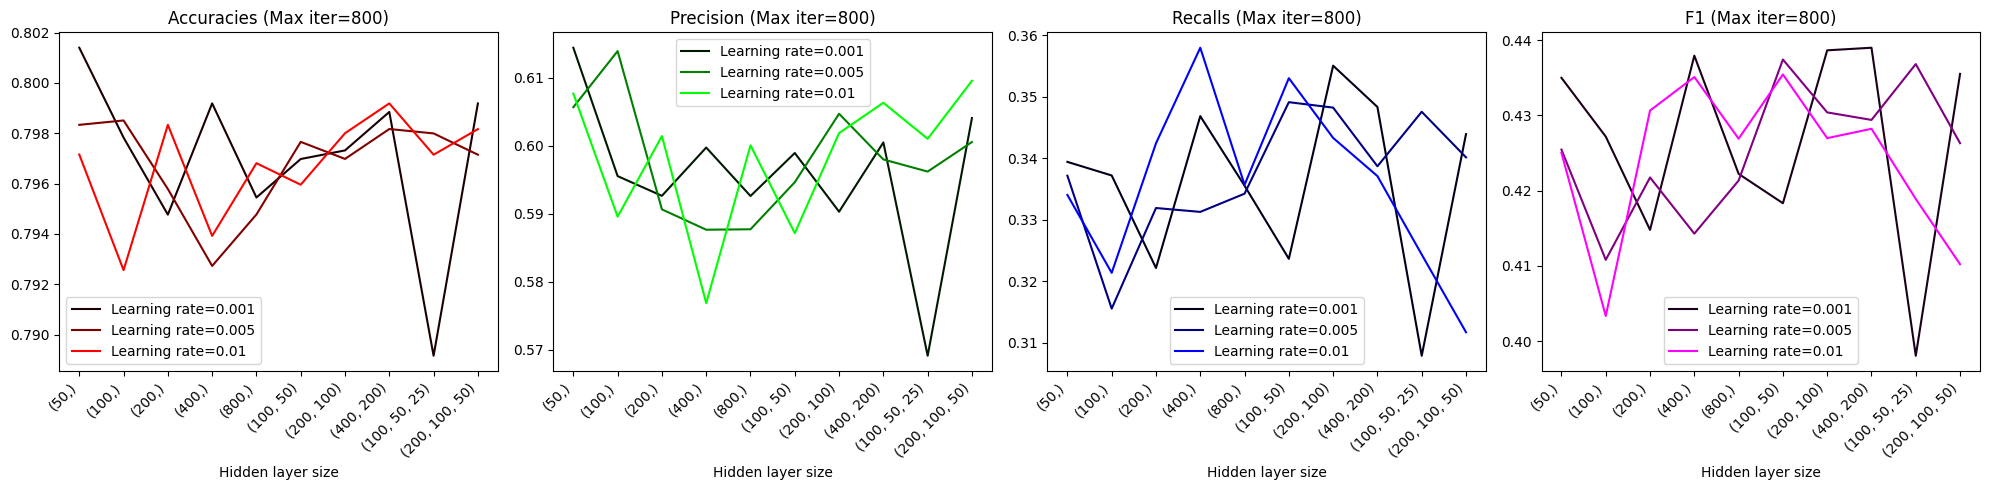

In [ ]:
#datos=np.array(metricas,dtype=object)
#dfmetricas=pd.DataFrame(datos,columns=['layers','learn','iters','acc','prec','rec','f1','conv'])
#dfmetricas.to_csv('datosperceptroncapas.csv', index=False)
hiddenlayer_values  = [ (50,), (100,), (200,), (400,), (800,), (100, 50), (200, 100), (400, 200), (100, 50, 25),(200,100,50)]    #valor predeterminado 100
learningrate_values = [0.001,0.005,0.01]  #valor predeterminado 0.001
maxiter_values      = [200,400,800]   #valor predeterminado 200
dfmetricas = pd.read_csv('datosperceptroncapas.csv')
df_mean=dfmetricas.groupby(['layers','learn','iters'],as_index=False).mean()

diffiters = [str(val) for val in maxiter_values]
difflrates= [str(val) for val in learningrate_values]
x_labels=   [str(val) for val in hiddenlayer_values]
for i in diffiters:
  df_ausar=df_mean[df_mean['iters']==float(i)]
  fig, axs = plt.subplots(1, 4, figsize=(20, 5))
  for j in difflrates:
    df_grafica=df_ausar[df_ausar['learn']==float(j)]
    axs[0].plot(x_labels, df_grafica['acc'], marker='', color=(float(j)/max(learningrate_values), 0, 0), label=f'Learning rate={j}')
    axs[1].plot(x_labels, df_grafica['prec'], marker='', color=(0,float(j)/max(learningrate_values), 0), label=f'Learning rate={j}')
    axs[2].plot(x_labels, df_grafica['rec'], marker='', color=(0, 0,float(j)/max(learningrate_values)), label=f'Learning rate={j}')
    axs[3].plot(x_labels, df_grafica['f1'], marker='', color=(float(j)/max(learningrate_values), 0,float(j)/max(learningrate_values)), label=f'Learning rate={j}')
  # Añadir leyendas
  for ax in axs:
    ax.legend()
    ax.set_xlabel('Hidden layer size')
    ax.set_xticks(range(len(x_labels)))  # Fija la posición de los ticks
    ax.set_xticklabels(x_labels, rotation=45, ha='right')  # Rota y alinea etiquetas
  axs[0].set_title(f'Accuracies (Max iter={i})')
  axs[1].set_title(f'Precision (Max iter={i})')
  axs[2].set_title(f'Recalls (Max iter={i})')
  axs[3].set_title(f'F1 (Max iter={i})')
plt.tight_layout()
plt.show()


Cada color de gráfica representa una de las medidas (accuracy, precision etc). Cada línea dentro de las gráficas un valor de aprendizaje distinto.
Una vez pasado esto tenemos tres filas de gráficas, una por cada valor de iteraciones máximas, y dentro de las gráficas individuales se comparan los valores de la métrica particular que se han obtenido para cada tamaño de las capas intermedias.

La impredecibilidad del modelo no viene únicamente como el aspecto de las gráficas, sino por los rangos de los valores obtenidos, oscilando con 800 iteraciones máximas entre el 0.4 y el 0.45 de f1, rangos de valores similares a los que usa kNN o los árboles de decisiones. El hecho de que los valores se mantengan en estos intervalos en lugar de saltar hacia accuracies malas quiere decir que si bien el modelo parece estar cayendo en el sesgo del dataset, se ha adaptado al set y no está realizando predicciones aleatorias, por mucho que la tendencia sea confusa. Disminuír los valores de aprendizaje por debajo de los probados en las gráficas parece empeorar drásticamente el modelo, reduciendo el f1 hasta un 0.2 (caso de valor de aprendizaje inicial de 0.0001)

Por otra parte, el modelo parece haber encontrado mejores resultados en aprendizajes rápidos con pocas iteraciones. Se puede ver que los peores resultados los ha encontrado para 100,50,25 neuronas por capa de forma consistente.

## Comparación de modelos

In [ ]:
# Cargar los datos del perceptrón
dfmetricas = pd.read_csv('datosperceptroncapas.csv')
df_mean=dfmetricas.groupby(['layers','learn','iters'],as_index=False).mean()

# Obtener mejor resultado de cada modelo
mejor_fila_knn = df_results2.loc[df_results2["test_f1"].idxmax()]
mejor_fila_rl = df_results3.loc[df_results3["test_f1"].idxmax()]
mejor_fila_arbol = df_results4.loc[df_results4["test_f1"].idxmax()]
mejor_fila_mlp = df_mean.loc[df_mean["f1"].idxmax()]

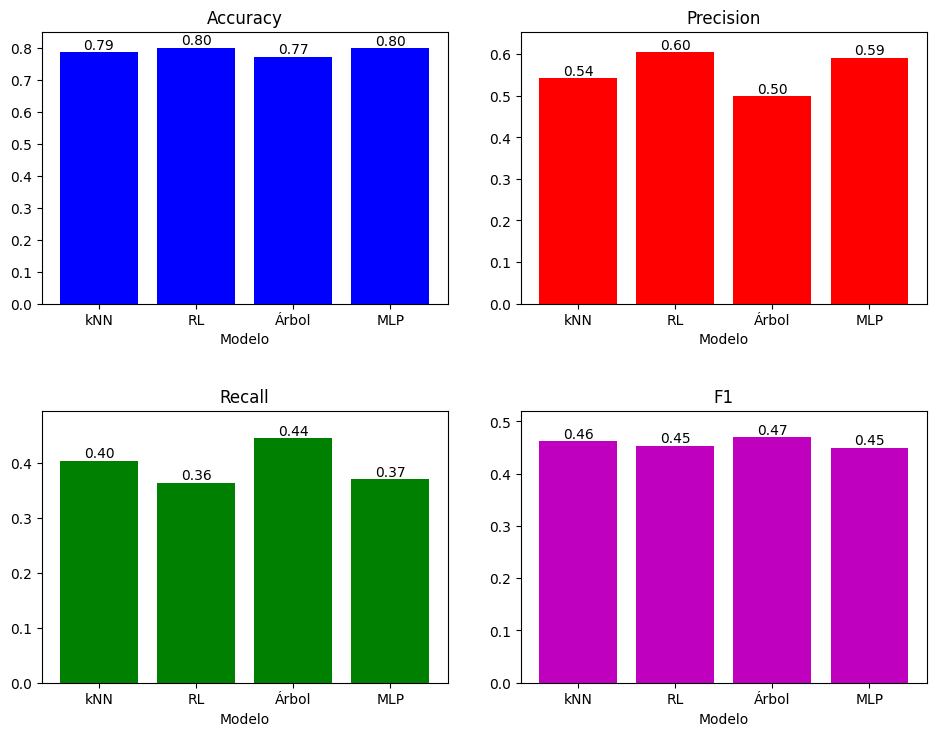

In [ ]:
# Definir las categorías
categorias = ['kNN', 'RL', 'Árbol', 'MLP']

# Obtener los valores a representar
valores_accuracy = [mejor_fila_knn['test_accuracy'], mejor_fila_rl['test_accuracy'], mejor_fila_arbol['test_accuracy'], mejor_fila_mlp['acc']]
valores_precision = [mejor_fila_knn['test_precision'], mejor_fila_rl['test_precision'], mejor_fila_arbol['test_precision'], mejor_fila_mlp['prec']]
valores_recall = [mejor_fila_knn['test_recall'], mejor_fila_rl['test_recall'], mejor_fila_arbol['test_recall'], mejor_fila_mlp['rec']]
valores_f1 = [mejor_fila_knn['test_f1'], mejor_fila_rl['test_f1'], mejor_fila_arbol['test_f1'], mejor_fila_mlp['f1']]

# Crear la figura y los subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Aumentar margen superior de la gráfica
axs[0, 0].set_ylim(0, max(valores_accuracy) + 0.05)
axs[0, 1].set_ylim(0, max(valores_precision) + 0.05)
axs[1, 0].set_ylim(0, max(valores_recall) + 0.05)
axs[1, 1].set_ylim(0, max(valores_f1) + 0.05)

# Gráfica de Accuracy
axs[0, 0].bar(categorias, valores_accuracy, color='b')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_xlabel('Modelo')

# Agregar los valores encima de las barras de Accuracy
for i, v in enumerate(valores_accuracy):
    axs[0, 0].text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Gráfica de Precision
axs[0, 1].bar(categorias, valores_precision, color='r')
axs[0, 1].set_title('Precision')
axs[0, 1].set_xlabel('Modelo')

# Agregar los valores encima de las barras de Precision
for i, v in enumerate(valores_precision):
    axs[0, 1].text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Gráfica de Recall
axs[1, 0].bar(categorias, valores_recall, color='g')
axs[1, 0].set_title('Recall')
axs[1, 0].set_xlabel('Modelo')

# Agregar los valores encima de las barras de Recall
for i, v in enumerate(valores_recall):
    axs[1, 0].text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Gráfica de F1
axs[1, 1].bar(categorias, valores_f1, color='m')
axs[1, 1].set_title('F1')
axs[1, 1].set_xlabel('Modelo')

# Agregar los valores encima de las barras de F1
for i, v in enumerate(valores_f1):
    axs[1, 1].text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Ajustar el diseño
plt.tight_layout(pad=3.0)

# Mostrar la gráfica
plt.show()


Como vemos en los diagramas de barras, respecto a la medida F1 se obtienen resultados muy similares entre modelos, en torno al 0,45 y el modelo que parece tener mejor rendimiento es el árbol de decisión, seguido por kNN.

Mostraremos los datos exactos en la siguiente tabla:

In [ ]:
tabla = pd.DataFrame({
    'Modelo': ['kNN', 'RL', 'Árbol', 'MLP'],
    'F1-score': [
        mejor_fila_knn['test_f1'],
        mejor_fila_rl['test_f1'],
        mejor_fila_arbol['test_f1'],
        mejor_fila_mlp['f1']
    ]
})

tabla

,Modelo,F1-score
0,kNN,0.462725
1,RL,0.453782
2,Árbol,0.470309
3,MLP,0.450107


# Balanceo de variables

A pesar de todo, hay que tener en cuenta en los ejercicios anteriores que el dataset se encuentra tremendamente desbalanceado, con un porcentaje de vinos teniendo un valor de calidad 0 muy superior a la calidad 1. Como se pudo ver, esto es una de las razones detrás de la diferencia entre valores de accuracy y de f1.
Para tratar de paliar esto se realiza un pequeño experimento eliminando valores del grupo mayoritario usando:

In [ ]:
"""
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)"""

Mediante el undersampler, se eliminan instancias aleatorias de la clase mayoritaria para tratar de quitar el sesgo en el aprendizaje. Sin embargo, debido a lo desbalanceado del dataset actual la cantidad de datos se reduce de modo exagerado, bajando la fiabilidad de los resultados obtenidos

## Códigos usando el undersampler

### kNN


Test interno: Mejor k = 15
Métricas de validación interna -> Accuracy: 0.6891, Precision: 0.4002, Recall: 0.7286, F1: 0.5159
Métricas en test externo -> Accuracy: 0.6952, Precision: 0.4069, Recall: 0.7444, F1: 0.5261

Test interno: Mejor k = 101
Métricas de validación interna -> Accuracy: 0.6738, Precision: 0.3893, Recall: 0.7647, F1: 0.5153
Métricas en test externo -> Accuracy: 0.6871, Precision: 0.4083, Recall: 0.8386, F1: 0.5492

Test interno: Mejor k = 51
Métricas de validación interna -> Accuracy: 0.6952, Precision: 0.4130, Recall: 0.8005, F1: 0.5442
Métricas en test externo -> Accuracy: 0.6442, Precision: 0.3660, Recall: 0.7713, F1: 0.4964



   best_k  internal_accuracy  internal_precision  internal_recall  \
0      15           0.689097            0.400150         0.728644   
1     101           0.673795            0.389253         0.764720   
2      51           0.695200            0.413010         0.800515   

   internal_f1  test_accuracy  test_precision  test_recall   test

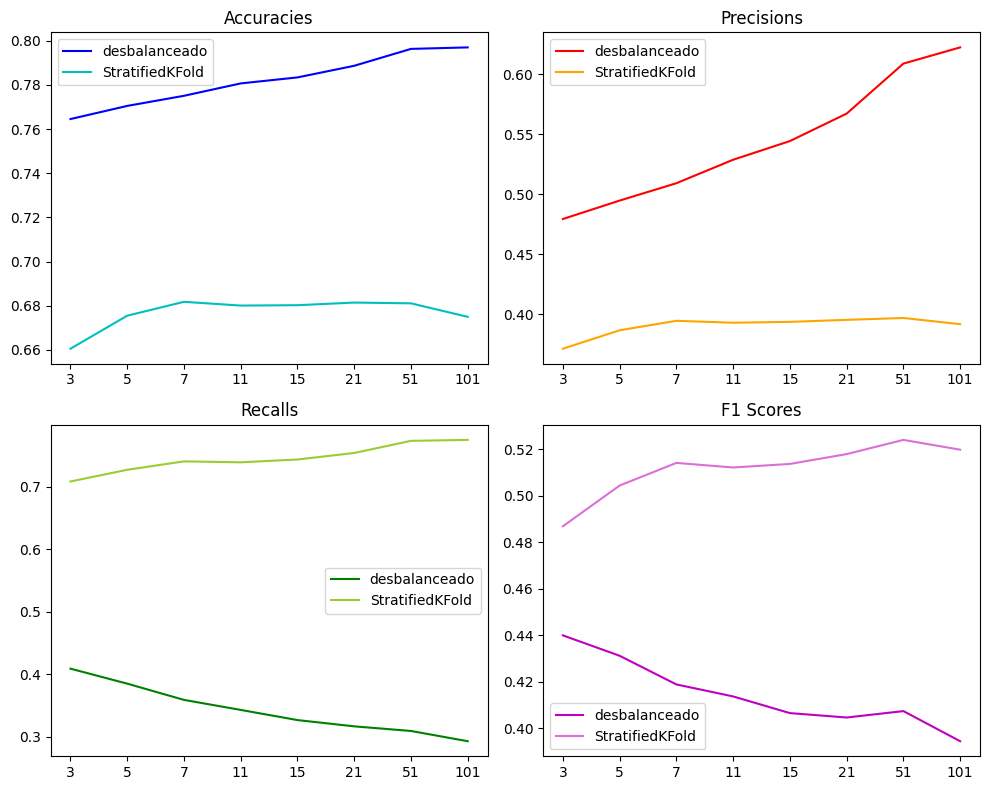

In [ ]:
# Lista de valores de k para validación interna
k_values = [3, 5, 7, 11, 15, 21, 51, 101]

#Obtenemos los datos del dataset completo
X = df_shuffled.drop(columns=["booleano"]) # Datos
y = df_shuffled["booleano"] # Etiqueta

#StratifiedKFold para validación externa
skf_external = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

results2 = []
metricas2 =[] # En esta variable se van a guardar los valores de las métricas de éxito alcanzadas por cada k

for train_idx, test_idx in skf_external.split(X, y):#Obtenemos los índices de los datos de cada partición

    x_train, x_test = X.iloc[train_idx], X.iloc[test_idx] #Obtenemos los datos de cada partición
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    #Variables para la validación interna
    best_k = None
    best_score = 0
    best_metrics = None

    for k in k_values:
        internal_scores = []
        internal_precisions = []
        internal_recalls = []
        internal_f1s = []

        #StratifiedKFold para validación interna
        skf_internal = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

        for train_int_idx, test_int_idx in skf_internal.split(x_train, y_train): #Obtenemos los índices de los datos de cada partición interna
            x_train_int, x_test_int = x_train.iloc[train_int_idx], x_train.iloc[test_int_idx]
            y_train_int, y_test_int = y_train.iloc[train_int_idx], y_train.iloc[test_int_idx]

            # Normalización
            train_int_norm, test_int_norm = normalizar(x_train_int, x_test_int)

            #Entrenamos el modelo con la k actual
            knn = KNeighborsClassifier(n_neighbors=k)
            undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
            X_resampled, y_resampled = undersampler.fit_resample(train_int_norm, y_train_int)
            knn.fit(X_resampled, y_resampled)
            y_pred_int = knn.predict(test_int_norm)

            #Evaluamos métricas y las guardamos
            accuracy_int = accuracy_score(y_test_int, y_pred_int)
            precision_int = precision_score(y_test_int, y_pred_int, zero_division=0)
            recall_int = recall_score(y_test_int, y_pred_int, zero_division=0)
            f1_int = f1_score(y_test_int, y_pred_int, zero_division=0)

            internal_scores.append(accuracy_int)
            internal_precisions.append(precision_int)
            internal_recalls.append(recall_int)
            internal_f1s.append(f1_int)

        # Promediamos los resultados de todas las validaciones internas para este k
        mean_accuracy = np.mean(internal_scores)
        mean_precision = np.mean(internal_precisions)
        mean_recall = np.mean(internal_recalls)
        mean_f1 = np.mean(internal_f1s)

        metricas2.append([k,mean_accuracy,mean_precision,mean_recall,mean_f1])

        if mean_f1 > best_score:  #Seleccionamos el k con mejor f1 interna
            best_score = mean_f1
            best_k = k
            best_metrics = {
                "accuracy": mean_accuracy,
                "precision": mean_precision,
                "recall": mean_recall,
                "f1_score": mean_f1
            }

    print(f"\nTest interno: Mejor k = {best_k}")
    print(f"Métricas de validación interna -> Accuracy: {best_metrics['accuracy']:.4f}, Precision: {best_metrics['precision']:.4f}, Recall: {best_metrics['recall']:.4f}, F1: {best_metrics['f1_score']:.4f}")

    # Normalización de datos
    train_normal, test_normal = normalizar(x_train, x_test)

    # Entrenar modelo final con mejor k
    knn = KNeighborsClassifier(n_neighbors=best_k)
    undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(train_normal, y_train)
    knn.fit(X_resampled, y_resampled)

    # Evaluar en test externo
    y_pred = knn.predict(test_normal)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"Métricas en test externo -> Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    results2.append({
        "best_k": best_k,
        "internal_accuracy": best_metrics["accuracy"],
        "internal_precision": best_metrics["precision"],
        "internal_recall": best_metrics["recall"],
        "internal_f1": best_metrics["f1_score"],
        "test_accuracy": accuracy,
        "test_precision": precision,
        "test_recall": recall,
        "test_f1": f1
    })

#Mostrar resultados finales
df_results2 = pd.DataFrame(results2)
print("\n\n")
print(df_results2)
print("\n")

nparray=np.array(metricas1)
nparray2=np.array(metricas2)

accs = []
prec = []
rec = []
f1 = []

accs2 = []
prec2 = []
rec2 = []
f1_2 = []

for i in k_values:
    #Resultados iniciales
    subset=nparray[nparray[:, 0]==i]
    media_acc=np.mean(subset[:,1])
    media_prec=np.mean(subset[:,2])
    media_rec=np.mean(subset[:,3])
    media_f1=np.mean(subset[:,4])
    accs.append(media_acc)
    prec.append(media_prec)
    rec.append(media_rec)
    f1.append(media_f1)

    #Resultados stratifiedkfold
    subset2=nparray2[nparray2[:, 0]==i]
    media_acc_2=np.mean(subset2[:,1])
    media_prec_2=np.mean(subset2[:,2])
    media_rec_2=np.mean(subset2[:,3])
    media_f1_2=np.mean(subset2[:,4])
    accs2.append(media_acc_2)
    prec2.append(media_prec_2)
    rec2.append(media_rec_2)
    f1_2.append(media_f1_2)

x_labels = [str(val) for val in k_values]
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(x_labels, accs, marker='', color='b', label='desbalanceado')
axs[0, 0].plot(x_labels, accs2, marker='', color='c', label='StratifiedKFold')
axs[0, 0].set_title('Accuracies')
axs[0, 0].set_xticks(x_labels)
axs[0, 0].legend()

axs[0, 1].plot(x_labels, prec, marker='', color='r', label='desbalanceado')
axs[0, 1].plot(x_labels, prec2, marker='', color='orange', label='StratifiedKFold')
axs[0, 1].set_title('Precisions')
axs[0, 1].set_xticks(x_labels)
axs[0, 1].legend()

axs[1, 0].plot(x_labels, rec, marker='', color='g', label='desbalanceado')
axs[1, 0].plot(x_labels, rec2, marker='', color='yellowgreen', label='StratifiedKFold')
axs[1, 0].set_title('Recalls')
axs[1, 0].set_xticks(x_labels)
axs[1, 0].legend()

axs[1, 1].plot(x_labels, f1, marker='', color='m', label='desbalanceado')
axs[1, 1].plot(x_labels, f1_2, marker='', color='orchid', label='StratifiedKFold')
axs[1, 1].set_title('F1 Scores')
axs[1, 1].set_xticks(x_labels)
axs[1, 1].legend()

plt.tight_layout()
plt.show()

### Regresión Logística


Test interno: Mejor C = 10, Mejor penalty = l2
Métricas de validación interna -> Accuracy: 0.7156, Precision: 0.4251, Recall: 0.7129, F1: 0.5325
Métricas en test externo -> Accuracy: 0.7176, Precision: 0.4266, Recall: 0.7040, F1: 0.5313

Test interno: Mejor C = 1, Mejor penalty = l2
Métricas de validación interna -> Accuracy: 0.7064, Precision: 0.4154, Recall: 0.7175, F1: 0.5259
Métricas en test externo -> Accuracy: 0.7339, Precision: 0.4486, Recall: 0.7444, F1: 0.5599

Test interno: Mejor C = 1, Mejor penalty = l2
Métricas de validación interna -> Accuracy: 0.7212, Precision: 0.4328, Recall: 0.7333, F1: 0.5440
Métricas en test externo -> Accuracy: 0.6983, Precision: 0.4057, Recall: 0.7040, F1: 0.5148



   best_c best_penalty  internal_accuracy  internal_precision  \
0      10           l2           0.715597            0.425056   
1       1           l2           0.706424            0.415428   
2       1           l2           0.721205            0.432760   

   internal_recall  inte

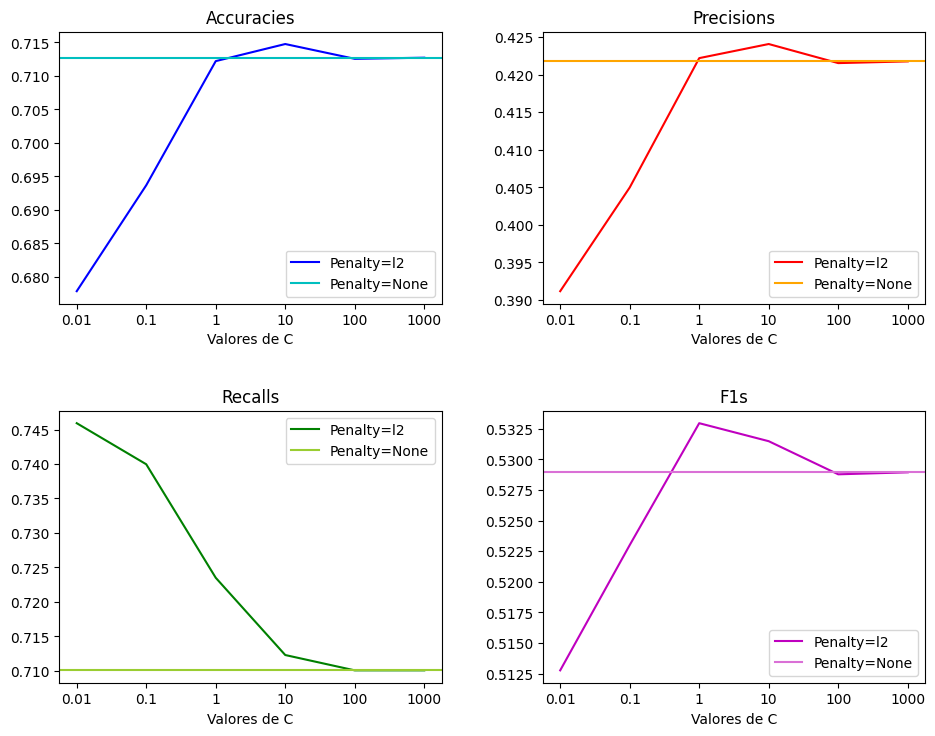

In [ ]:
# Lista de valores de C y tipos de penalty para validación interna
penalty_types = [None, 'l2']
c_values = [0.01, 0.1, 1, 10, 100, 1000]

#Obtenemos los datos del dataset completo
X = df_shuffled.drop(columns=["booleano"]) # Datos
y = df_shuffled["booleano"] # Etiqueta

#StratifiedKFold para validación externa
skf_external = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

results3 = []
metricas_l2 = []
metricas_none = []

for train_idx, test_idx in skf_external.split(X, y):#Obtenemos los índices de los datos de cada partición

    x_train, x_test = X.iloc[train_idx], X.iloc[test_idx] #Obtenemos los datos de cada partición
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    #Variables para la validación interna
    best_param = None
    best_score = 0
    best_hyperparams = None

    for penalty in penalty_types:
      if penalty is None: #Si penalty es None no importa el valor de C, por lo que no hay que hacer un bucle con sus valores
        internal_scores = []
        internal_precisions = []
        internal_recalls = []
        internal_f1s = []

        #StratifiedKFold para validación interna
        skf_internal = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

        for train_int_idx, test_int_idx in skf_internal.split(x_train, y_train): #Obtenemos los índices de los datos de cada partición interna
            x_train_int, x_test_int = x_train.iloc[train_int_idx], x_train.iloc[test_int_idx]
            y_train_int, y_test_int = y_train.iloc[train_int_idx], y_train.iloc[test_int_idx]

            # Normalización
            train_int_norm, test_int_norm = normalizar(x_train_int, x_test_int)

            # Entrenar modelo de regresión logística
            model = LogisticRegression(penalty=penalty)
            undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
            X_resampled, y_resampled = undersampler.fit_resample(train_int_norm, y_train_int)
            model.fit(X_resampled, y_resampled)
            y_pred_int = model.predict(test_int_norm)

            #Evaluamos métricas y las guardamos
            accuracy_int = accuracy_score(y_test_int, y_pred_int)
            precision_int = precision_score(y_test_int, y_pred_int, zero_division=0)
            recall_int = recall_score(y_test_int, y_pred_int, zero_division=0)
            f1_int = f1_score(y_test_int, y_pred_int, zero_division=0)

            internal_scores.append(accuracy_int)
            internal_precisions.append(precision_int)
            internal_recalls.append(recall_int)
            internal_f1s.append(f1_int)

        # Promediamos los resultados de todas las validaciones internas para esta combinación de parámetros
        mean_accuracy = np.mean(internal_scores)
        mean_precision = np.mean(internal_precisions)
        mean_recall = np.mean(internal_recalls)
        mean_f1 = np.mean(internal_f1s)

        metricas_none.append([mean_accuracy,mean_precision,mean_recall,mean_f1])

        if mean_f1 > best_score:
            best_score = mean_f1
            best_c = None  #Valor sin importancia
            best_penalty = penalty
            best_metrics = {
                "accuracy": mean_accuracy,
                "precision": mean_precision,
                "recall": mean_recall,
                "f1_score": mean_f1
            }
      else:
        for c in c_values:
          internal_scores = []
          internal_precisions = []
          internal_recalls = []
          internal_f1s = []

          #StratifiedKFold para validación interna
          skf_internal = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

          for train_int_idx, test_int_idx in skf_internal.split(x_train, y_train): #Obtenemos los índices de los datos de cada partición interna
              x_train_int, x_test_int = x_train.iloc[train_int_idx], x_train.iloc[test_int_idx]
              y_train_int, y_test_int = y_train.iloc[train_int_idx], y_train.iloc[test_int_idx]

              # Normalización
              train_int_norm, test_int_norm = normalizar(x_train_int, x_test_int)

              # Entrenar modelo de regresión logística
              model = LogisticRegression(penalty=penalty, C=c)
              undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
              X_resampled, y_resampled = undersampler.fit_resample(train_int_norm, y_train_int)
              model.fit(X_resampled, y_resampled)
              y_pred_int = model.predict(test_int_norm)

              #Evaluamos métricas y las guardamos
              accuracy_int = accuracy_score(y_test_int, y_pred_int)
              precision_int = precision_score(y_test_int, y_pred_int, zero_division=0)
              recall_int = recall_score(y_test_int, y_pred_int, zero_division=0)
              f1_int = f1_score(y_test_int, y_pred_int, zero_division=0)

              internal_scores.append(accuracy_int)
              internal_precisions.append(precision_int)
              internal_recalls.append(recall_int)
              internal_f1s.append(f1_int)

          # Promediamos los resultados de todas las validaciones internas para esta combinación de parámetros
          mean_accuracy = np.mean(internal_scores)
          mean_precision = np.mean(internal_precisions)
          mean_recall = np.mean(internal_recalls)
          mean_f1 = np.mean(internal_f1s)

          metricas_l2.append([c,mean_accuracy,mean_precision,mean_recall,mean_f1])

          if mean_f1 > best_score:
              best_score = mean_f1
              best_c = c
              best_penalty = penalty
              best_metrics = {
                  "accuracy": mean_accuracy,
                  "precision": mean_precision,
                  "recall": mean_recall,
                  "f1_score": mean_f1
              }

    print(f"\nTest interno: Mejor C = {best_c}, Mejor penalty = {best_penalty}")
    print(f"Métricas de validación interna -> Accuracy: {best_metrics['accuracy']:.4f}, Precision: {best_metrics['precision']:.4f}, Recall: {best_metrics['recall']:.4f}, F1: {best_metrics['f1_score']:.4f}")

    # Normalización de datos
    train_normal, test_normal = normalizar(x_train, x_test)

    # Entrenar modelo final con los mejores hiperparámetros
    if best_c == None:
      model = LogisticRegression(penalty=best_penalty)
    else:
      model = LogisticRegression(penalty=best_penalty, C=best_c)

    undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(train_normal, y_train)
    model.fit(X_resampled, y_resampled)

    # Evaluar en test externo
    y_pred = model.predict(test_normal)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"Métricas en test externo -> Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    results3.append({
        "best_c": best_c,
        "best_penalty": best_penalty,
        "internal_accuracy": best_metrics["accuracy"],
        "internal_precision": best_metrics["precision"],
        "internal_recall": best_metrics["recall"],
        "internal_f1": best_metrics["f1_score"],
        "test_accuracy": accuracy,
        "test_precision": precision,
        "test_recall": recall,
        "test_f1": f1
    })

# Mostrar resultados finales
df_results3 = pd.DataFrame(results3)
print("\n\n")
print(df_results3)
print("\n")
nparray=np.array(metricas_l2)

accs=[]
prec=[]
rec=[]
f1=[]
for i in c_values:
  subset=nparray[nparray[:, 0]==i]
  media_acc=np.mean(subset[:,1])
  media_prec=np.mean(subset[:,2])
  media_rec=np.mean(subset[:,3])
  media_f1=np.mean(subset[:,4])
  accs.append(media_acc)
  prec.append(media_prec)
  rec.append(media_rec)
  f1.append(media_f1)

nparray2=np.array(metricas_none)
media = np.mean(nparray2, axis=0)

x_labels = [str(val) for val in c_values]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(x_labels, accs, color='b',  label='Penalty=l2')
axs[0, 0].axhline(y=media[0], color='c',  label='Penalty=None')
axs[0, 0].set_title('Accuracies')
axs[0, 0].set_xticks(x_labels)
axs[0, 0].set_xlabel('Valores de C')
axs[0, 0].legend()

axs[0, 1].plot(x_labels, prec, color='r',  label='Penalty=l2')
axs[0, 1].axhline(y=media[1], color='orange',  label='Penalty=None')
axs[0, 1].set_title('Precisions')
axs[0, 1].set_xticks(x_labels)
axs[0, 1].set_xlabel('Valores de C')
axs[0, 1].legend()

axs[1, 0].plot(x_labels, rec, color='g',  label='Penalty=l2')
axs[1, 0].axhline(y=media[2], color='Yellowgreen',  label='Penalty=None')
axs[1, 0].set_title('Recalls')
axs[1, 0].set_xticks(x_labels)
axs[1, 0].set_xlabel('Valores de C')
axs[1, 0].legend()

axs[1, 1].plot(x_labels, f1, color='m',  label='Penalty=l2')
axs[1, 1].axhline(y=media[3], color='orchid',  label='Penalty=None')
axs[1, 1].set_title('F1s')
axs[1, 1].set_xticks(x_labels)
axs[1, 1].set_xlabel('Valores de C')
axs[1, 1].legend()

plt.tight_layout(pad=3.0)
plt.show()

### Árboles de decisión


Test interno: Mejor max_depth = 3, min_samples_split = 2, min_samples_leaf = 5
Métricas de validación interna -> Accuracy: 0.6998, Precision: 0.4130, Recall: 0.7356, F1: 0.5269
Métricas en test externo -> Accuracy: 0.6860, Precision: 0.3995, Recall: 0.7578, F1: 0.5232

Test interno: Mejor max_depth = 3, min_samples_split = 2, min_samples_leaf = 1
Métricas de validación interna -> Accuracy: 0.6626, Precision: 0.3893, Recall: 0.7402, F1: 0.4988
Métricas en test externo -> Accuracy: 0.7125, Precision: 0.4306, Recall: 0.8206, F1: 0.5648

Test interno: Mejor max_depth = 3, min_samples_split = 2, min_samples_leaf = 1
Métricas de validación interna -> Accuracy: 0.6779, Precision: 0.3972, Recall: 0.7826, F1: 0.5250
Métricas en test externo -> Accuracy: 0.6728, Precision: 0.3891, Recall: 0.7713, F1: 0.5173



   best_max_depth  best_min_samples_split  best_min_samples_leaf  \
0               3                       2                      5   
1               3                       2          

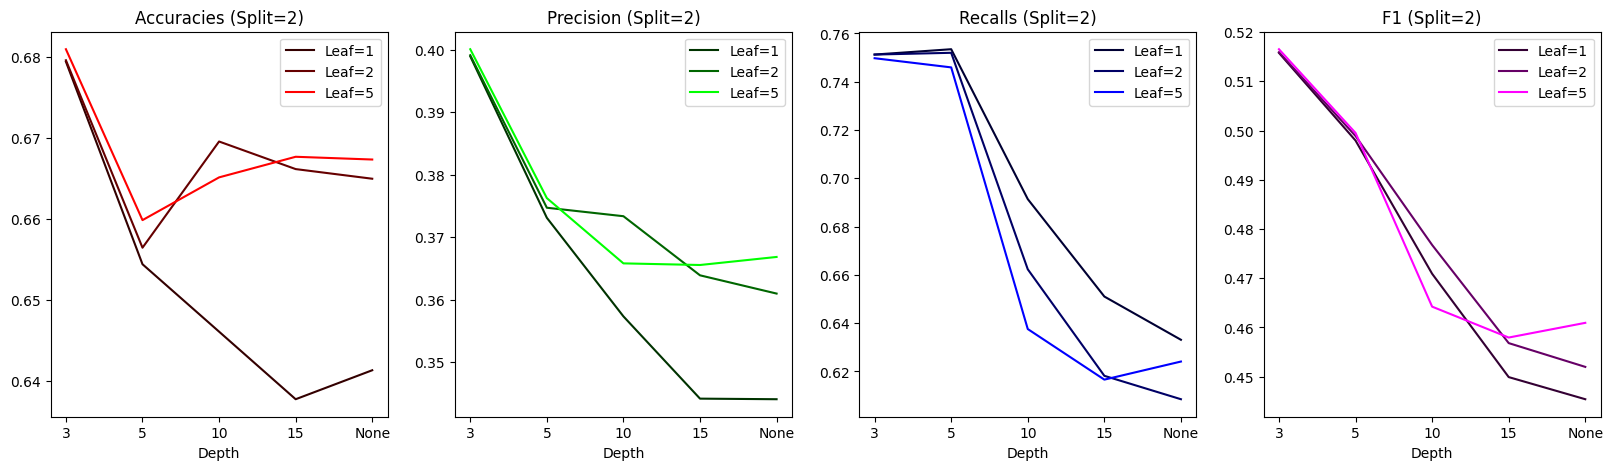

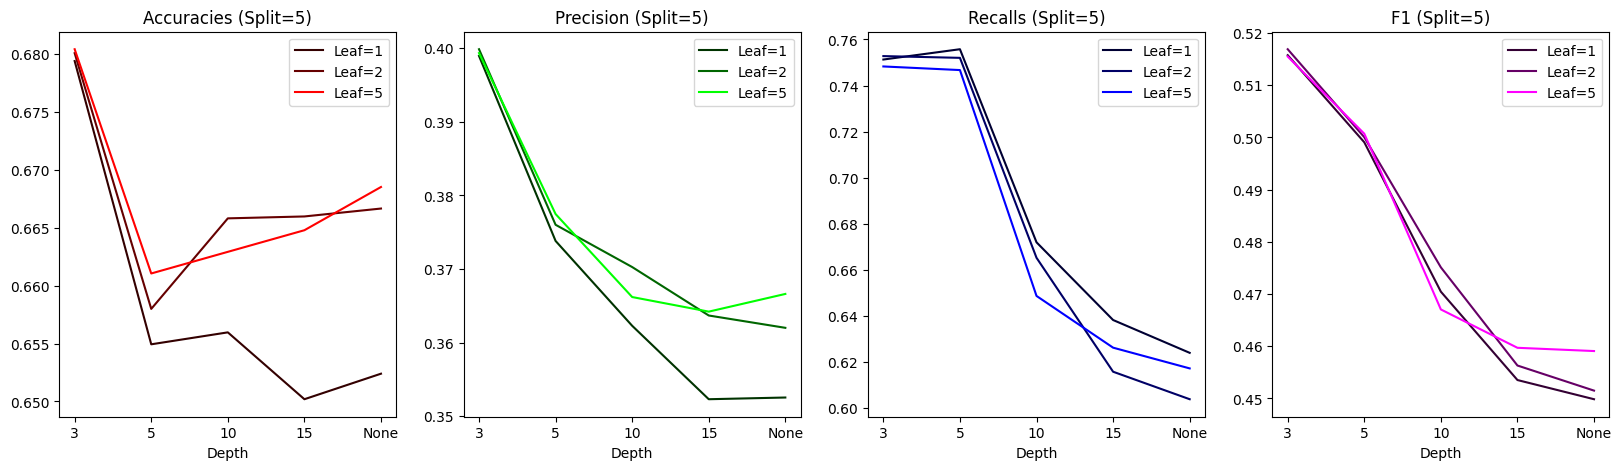

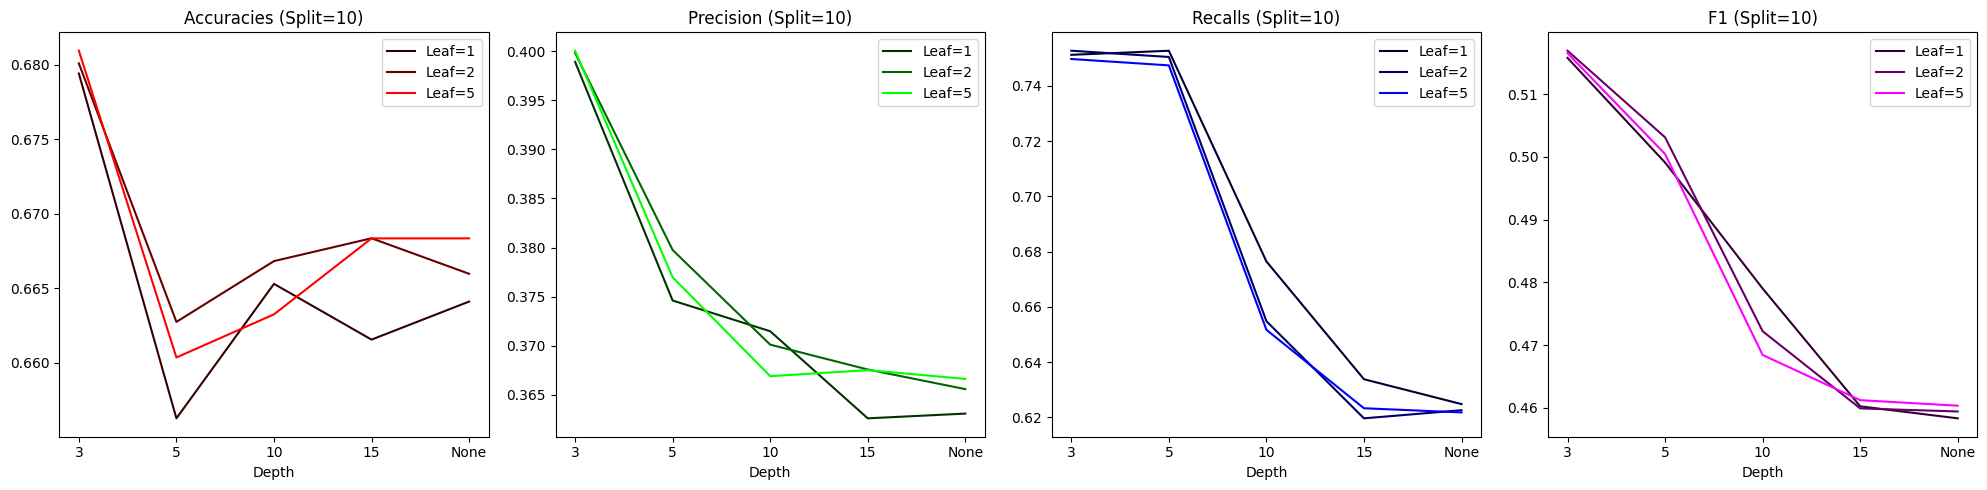

In [ ]:
# Lista de valores de hiperparámetros para validación interna
max_depth_values = [3, 5, 10, 15, None]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 5]

#Obtenemos los datos del dataset completo
X = df_shuffled.drop(columns=["booleano"]) # Datos
y = df_shuffled["booleano"] # Etiqueta

#StratifiedKFold para validación externa
skf_external = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

results4 = []
metricas3 = []

for train_idx, test_idx in skf_external.split(X, y):#Obtenemos los índices de los datos de cada partición

    x_train, x_test = X.iloc[train_idx], X.iloc[test_idx] #Obtenemos los datos de cada partición
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    #Variables para la validación interna
    best_hyperparams = None
    best_score = 0
    best_metrics = None

    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for min_samples_leaf in min_samples_leaf_values:
                internal_scores = []
                internal_precisions = []
                internal_recalls = []
                internal_f1s = []

                #StratifiedKFold para validación interna
                skf_internal = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

                for train_int_idx, test_int_idx in skf_internal.split(x_train, y_train): #Obtenemos los índices de los datos de cada partición interna
                    x_train_int, x_test_int = x_train.iloc[train_int_idx], x_train.iloc[test_int_idx]
                    y_train_int, y_test_int = y_train.iloc[train_int_idx], y_train.iloc[test_int_idx]

                    train_int_norm, test_int_norm = normalizar(x_train_int, x_test_int)

                    # Entrenar modelo de árbol de decisión
                    model = DecisionTreeClassifier(
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf
                    )
                    undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
                    X_resampled, y_resampled = undersampler.fit_resample(train_int_norm, y_train_int)
                    model.fit(X_resampled, y_resampled)
                    y_pred_int = model.predict(test_int_norm)

                    #Evaluamos métricas y las guardamos
                    internal_scores.append(accuracy_score(y_test_int, y_pred_int))
                    internal_precisions.append(precision_score(y_test_int, y_pred_int, zero_division=0))
                    internal_recalls.append(recall_score(y_test_int, y_pred_int, zero_division=0))
                    internal_f1s.append(f1_score(y_test_int, y_pred_int, zero_division=0))

                # Promediamos los resultados
                mean_accuracy = np.mean(internal_scores)
                mean_precision = np.mean(internal_precisions)
                mean_recall = np.mean(internal_recalls)
                mean_f1 = np.mean(internal_f1s)

                metricas3.append([max_depth,min_samples_split,min_samples_leaf,mean_accuracy,mean_precision,mean_recall,mean_f1])

                if mean_f1 > best_score:
                    best_score = mean_f1
                    best_hyperparams = (max_depth, min_samples_split, min_samples_leaf)
                    best_metrics = {
                        "accuracy": mean_accuracy,
                        "precision": mean_precision,
                        "recall": mean_recall,
                        "f1_score": mean_f1
                    }

    print(f"\nTest interno: Mejor max_depth = {best_hyperparams[0]}, min_samples_split = {best_hyperparams[1]}, min_samples_leaf = {best_hyperparams[2]}")
    print(f"Métricas de validación interna -> Accuracy: {best_metrics['accuracy']:.4f}, Precision: {best_metrics['precision']:.4f}, Recall: {best_metrics['recall']:.4f}, F1: {best_metrics['f1_score']:.4f}")


    # Normalización de datos
    train_normal, test_normal = normalizar(x_train, x_test)

    # Entrenar modelo final con los mejores hiperparámetros
    model = DecisionTreeClassifier(
        max_depth=best_hyperparams[0],
        min_samples_split=best_hyperparams[1],
        min_samples_leaf=best_hyperparams[2]
    )
    undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(train_normal, y_train)
    model.fit(X_resampled, y_resampled)

    # Evaluar en test externo
    y_pred = model.predict(test_normal)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"Métricas en test externo -> Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    results4.append({
        "best_max_depth": best_hyperparams[0],
        "best_min_samples_split": best_hyperparams[1],
        "best_min_samples_leaf": best_hyperparams[2],
        "internal_accuracy": best_metrics["accuracy"],
        "internal_precision": best_metrics["precision"],
        "internal_recall": best_metrics["recall"],
        "internal_f1": best_metrics["f1_score"],
        "test_accuracy": accuracy,
        "test_precision": precision,
        "test_recall": recall,
        "test_f1": f1
    })

# Mostrar resultados finales
df_results4 = pd.DataFrame(results4)
print("\n\n")
print(df_results4)
print("\n")
datos=np.array(metricas3)
dfmetricas=pd.DataFrame(datos,columns=['depth','split','leaf','acc','prec','rec','f1'])
dfmetricas['depth'] = dfmetricas['depth'].fillna('None')
df_mean = dfmetricas.groupby(['depth', 'split', 'leaf'], as_index=False, sort=False).mean()
split = [str(val) for val in min_samples_split_values]
leaf = [str(val) for val in min_samples_leaf_values]
depth =[str(val) for val in max_depth_values]

for i in split:
  df_ausar=df_mean[df_mean['split']==float(i)]
  fig, axs = plt.subplots(1, 4, figsize=(20, 5))
  for j in leaf:
    df_grafica=df_ausar[df_ausar['leaf']==float(j)]
    axs[0].plot(depth, df_grafica['acc'], marker='', color=(float(j)/max(min_samples_leaf_values), 0, 0), label=f'Leaf={j}')
    axs[1].plot(depth, df_grafica['prec'], marker='', color=(0,float(j)/max(min_samples_leaf_values), 0), label=f'Leaf={j}')
    axs[2].plot(depth, df_grafica['rec'], marker='', color=(0, 0,float(j)/max(min_samples_leaf_values)), label=f'Leaf={j}')
    axs[3].plot(depth, df_grafica['f1'], marker='', color=(float(j)/max(min_samples_leaf_values), 0,float(j)/max(min_samples_leaf_values)), label=f'Leaf={j}')
  axs[0].legend()
  axs[1].legend()
  axs[2].legend()
  axs[3].legend()
  axs[0].set_xlabel('Depth')
  axs[1].set_xlabel('Depth')
  axs[2].set_xlabel('Depth')
  axs[3].set_xlabel('Depth')
  axs[0].set_title(f'Accuracies (Split={i})')
  axs[1].set_title(f'Precision (Split={i})')
  axs[2].set_title(f'Recalls (Split={i})')
  axs[3].set_title(f'F1 (Split={i})')

plt.tight_layout()
plt.show()

### Perceptrón multicapa

Debido a lo inabarcable que puede ser tener que ejecutar el perceptrón de nuevo, se incluye otro csv con los valores obtenidos

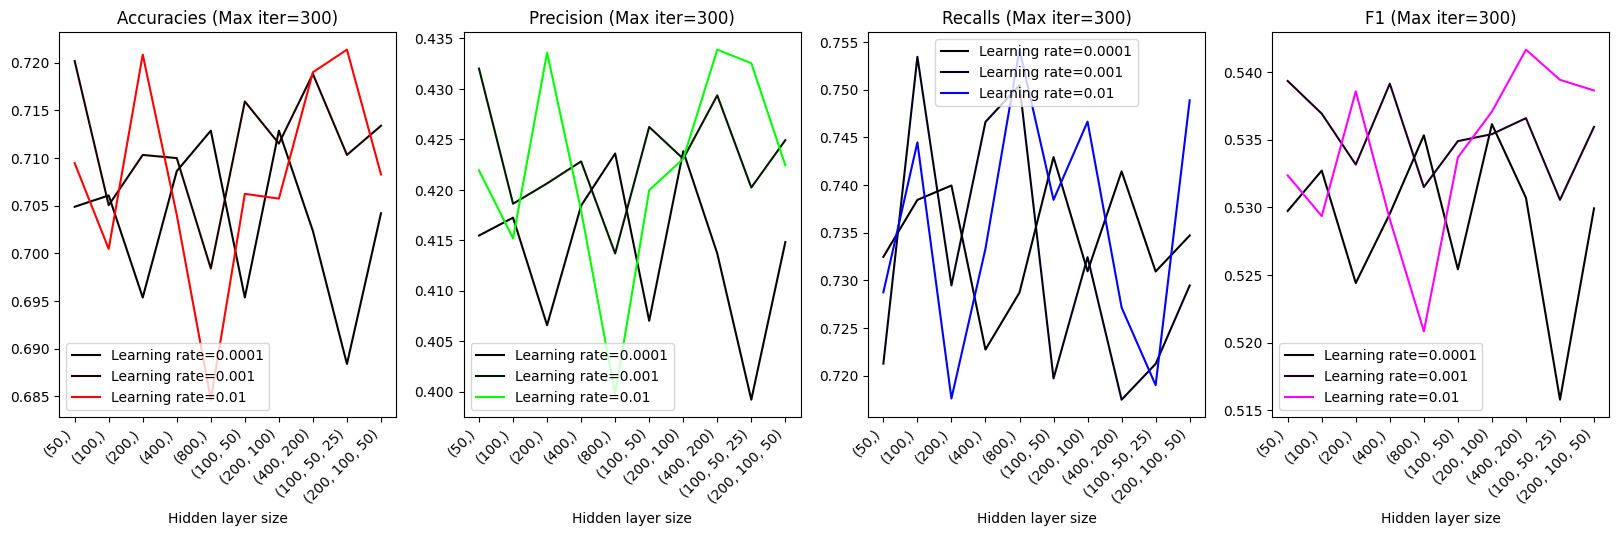

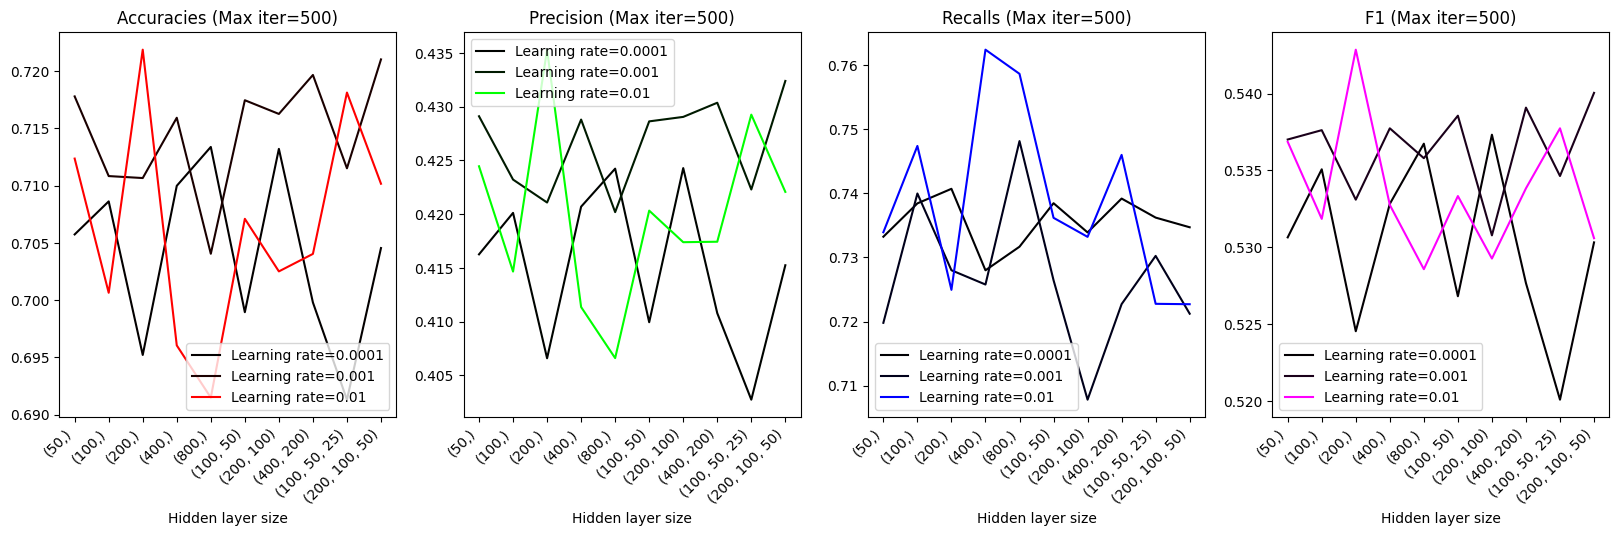

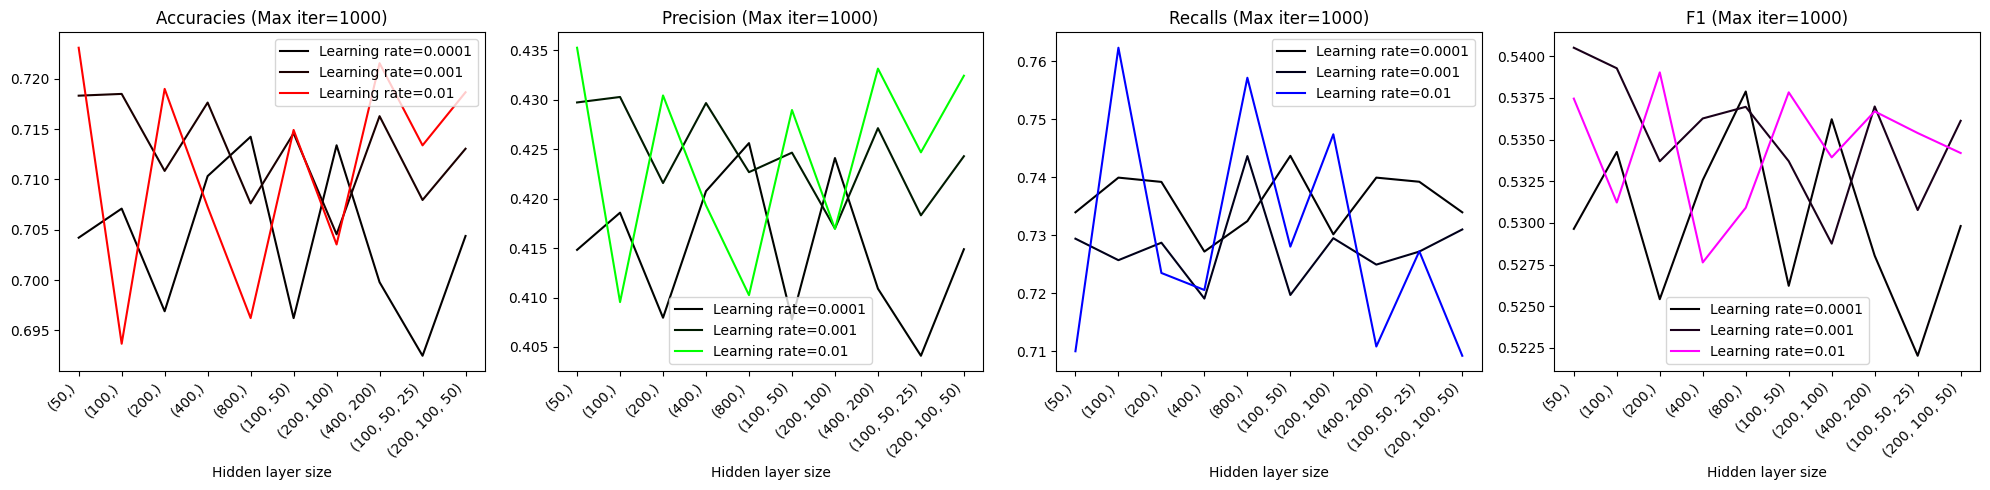

In [ ]:
"""from sklearn.neural_network import MLPClassifier
metricas=[]
#separacion de datos entre dataset y booleano
X = df_shuffled.drop(columns=["booleano"])
y = df_shuffled["booleano"]

#hiperparámetros a usar, se centra mayoritariamente en el hidden_layer_sizes antes que el learning rate y max iter como sugiere el enunciado
#número de neuronas en las capas no terminales
hiddenlayer_values  = [ (50,), (100,), (200,), (400,), (800,), (100, 50), (200, 100), (400, 200), (100, 50, 25),(200,100,50)]    #valor predeterminado 100
learningrate_values = [0.0001,0.001,0.01]  #valor predeterminado 0.001
maxiter_values      = [300,500,1000]   #valor predeterminado 200

#tres particiones de validación externa usando el kfold
skf_external = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
results = []
#realiza las tres iteraciones principales
for train_idx, test_idx in skf_external.split(X, y):
  x_train, x_test = X.iloc[train_idx], X.iloc[test_idx]
  y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

  best_hyperparams = None
  best_score = 0
  best_metrics = None


  #se itera por cada posible combinación de hiperparametros
  for hiddenlayer in hiddenlayer_values:
    for learningrate in learningrate_values:
      for maxiters in maxiter_values:
        internal_scores = []
        internal_precisions = []
        internal_recalls = []
        internal_f1s = []
        #se hacen las particiones internas
        skf_internal = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
        converged=1
        for train_int_idx, test_int_idx in skf_internal.split(x_train, y_train): #Obtenemos los índices de los datos de cada partición interna
          x_train_int, x_test_int = x_train.iloc[train_int_idx], x_train.iloc[test_int_idx]
          y_train_int, y_test_int = y_train.iloc[train_int_idx], y_train.iloc[test_int_idx]

          #normalización de datos (uno)
          train_int_norm, test_int_norm = normalizar(x_train_int, x_test_int)

          #se entrena y ejecuta el predictor como tal
          undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
          X_resampled, y_resampled = undersampler.fit_resample(train_int_norm, y_train_int)
          model = MLPClassifier(hidden_layer_sizes=hiddenlayer,learning_rate_init=learningrate,max_iter=maxiters).fit(X_resampled, y_resampled)
          if model.n_iter_ >= model.max_iter:
            converged=converged*0
          y_pred_int = model.predict(test_int_norm)

          #se guardan las variables parciales
          internal_scores.append(accuracy_score(y_test_int, y_pred_int))
          internal_precisions.append(precision_score(y_test_int, y_pred_int, zero_division=0))
          internal_recalls.append(recall_score(y_test_int, y_pred_int, zero_division=0))
          internal_f1s.append(f1_score(y_test_int, y_pred_int, zero_division=0))

        #se saca la media para la combinación de valores
        mean_accuracy = np.mean(internal_scores)
        mean_precision = np.mean(internal_precisions)
        mean_recall = np.mean(internal_recalls)
        mean_f1 = np.mean(internal_f1s)

        metricas.append([hiddenlayer,learningrate,maxiters,mean_accuracy,mean_precision,mean_recall,mean_f1,converged])
        if mean_f1 > best_score:
          best_score = mean_f1
          best_hyperparams = (hiddenlayer, learningrate, maxiters)
          best_metrics = {"accuracy": mean_accuracy,"precision": mean_precision,"recall": mean_recall,"f1_score": mean_f1}

  print(f"\nTest interno: Mejor max_depth = {best_hyperparams[0]}, min_samples_split = {best_hyperparams[1]}, min_samples_leaf = {best_hyperparams[2]}")
  print(f"Métricas de validación interna -> Accuracy: {best_metrics['accuracy']:.4f}, Precision: {best_metrics['precision']:.4f}, Recall: {best_metrics['recall']:.4f}, F1: {best_metrics['f1_score']:.4f}")


  #normalización de datos (uno)
  train_normal, test_normal = normalizar(x_train, x_test)

  # Entrenar modelo final con los mejores hiperparámetros
  #se entrena y ejecuta el predictor
  undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
  X_resampled, y_resampled = undersampler.fit_resample(train_normal, y_train)
  model = MLPClassifier(hidden_layer_sizes=best_hyperparams[0],learning_rate_init=best_hyperparams[1],max_iter=best_hyperparams[2]).fit(X_resampled, y_resampled)
  y_pred= model.predict(test_normal)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, zero_division=0)
  recall = recall_score(y_test, y_pred, zero_division=0)
  f1 = f1_score(y_test, y_pred, zero_division=0)

  print(f"Métricas en test externo -> Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

  results.append({
        "best hidden_layer_sizes": best_hyperparams[0],
        "best learning_rate_init": best_hyperparams[1],
        "best max_iter": best_hyperparams[2],
        "internal_accuracy": best_metrics["accuracy"],
        "internal_precision": best_metrics["precision"],
        "internal_recall": best_metrics["recall"],
        "internal_f1": best_metrics["f1_score"],
        "test_accuracy": accuracy,
        "test_precision": precision,
        "test_recall": recall,
        "test_f1": f1
  })

df_results = pd.DataFrame(results)
print("\n\n")
print(df_results)
print("\n")
datos=np.array(metricas,dtype=object)

dfmetricas=pd.DataFrame(datos,columns=['layers','learn','iters','acc','prec','rec','f1'])
dfmetricas.to_csv('datosperceptronbalance.csv', index=False)"""
hiddenlayer_values  = [ (50,), (100,), (200,), (400,), (800,), (100, 50), (200, 100), (400, 200), (100, 50, 25),(200,100,50)]     #valor predeterminado 100
learningrate_values = [0.0001,0.001,0.01]  #valor predeterminado 0.001
maxiter_values      = [300,500,1000]  #valor predeterminado 200
dfmetricas = pd.read_csv('datosperceptronbalance.csv')
df_mean=dfmetricas.groupby(['layers','learn','iters'],as_index=False).mean()

diffiters = [str(val) for val in maxiter_values]
difflrates= [str(val) for val in learningrate_values]
x_labels=   [str(val) for val in hiddenlayer_values]
for i in diffiters:
  df_ausar=df_mean[df_mean['iters']==float(i)]
  fig, axs = plt.subplots(1, 4, figsize=(20, 5))
  for j in difflrates:
    df_grafica=df_ausar[df_ausar['learn']==float(j)]
    axs[0].plot(x_labels, df_grafica['acc'], marker='', color=(float(j)/max(learningrate_values), 0, 0), label=f'Learning rate={j}')
    axs[1].plot(x_labels, df_grafica['prec'], marker='', color=(0,float(j)/max(learningrate_values), 0), label=f'Learning rate={j}')
    axs[2].plot(x_labels, df_grafica['rec'], marker='', color=(0, 0,float(j)/max(learningrate_values)), label=f'Learning rate={j}')
    axs[3].plot(x_labels, df_grafica['f1'], marker='', color=(float(j)/max(learningrate_values), 0,float(j)/max(learningrate_values)), label=f'Learning rate={j}')
  # Añadir leyendas
  for ax in axs:
    ax.legend()
    ax.set_xlabel('Hidden layer size')
    ax.set_xticks(range(len(x_labels)))  # Fija la posición de los ticks
    ax.set_xticklabels(x_labels, rotation=45, ha='right')  # Rota y alinea etiquetas
  axs[0].set_title(f'Accuracies (Max iter={i})')
  axs[1].set_title(f'Precision (Max iter={i})')
  axs[2].set_title(f'Recalls (Max iter={i})')
  axs[3].set_title(f'F1 (Max iter={i})')
plt.tight_layout()
plt.show()



## Conclusión sobre el balanceo

Podemos fijarnos especialmente en como, si bien la medida de aciertos se mantiene o incluso se empeora, las otras dos métricas parecen acercarse al 50% mucho más, lo que implica que no solo se mejora el rendimiento de todos los modelos sino que podemos asegurar que se encuentran protegidos del sesgo previo.
De nuevo, cabe destacar que el dataset usado al principio y tras el balanceo es muy diferente en tamaño, y el nuevo tamaño de muestra puede generar problemas a la hora de probar finalmente cada modelo

# Carga del dataset de Test final

In [ ]:
df_test3 = pd.read_csv('./test_2.csv', delimiter=',')
cbl=[]
for i in df_test3['quality']:
  if i>=7:
    cbl.append(1)
  else:
    cbl.append(0)
df_test3['booleano']=cbl
df_test3 = df_test3.drop(columns=["quality"])
df_test3 = df_test3.drop(columns=["fixed acidity"])
df_test3 = df_test3.drop(columns=["volatile acidity"])
df_test3 = df_test3.drop(columns=["citric acid"])
df_test3 = df_test3.drop(columns=["free sulfur dioxide"])
df_test3 = df_test3.drop(columns=["pH"])
df_test3 = df_test3.drop(columns=["sulphates"])
#print(df_test3)

In [ ]:
X_train_final = df_shuffled.drop(columns=["booleano"]) # Datos
y_train_final = df_shuffled["booleano"] # Etiqueta

X_test_final = df_test3.drop(columns=["booleano"]) # Datos
y_test_final = df_test3["booleano"] # Etiqueta

train_norm, test_norm = normalizar(X_train_final, X_test_final)

# Test con los modelos finales

##kNN

In [ ]:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_norm, y_train_final)

#Evaluamos en el test externo
y_pred = knn.predict(test_norm)
accuracy = accuracy_score(y_test_final, y_pred)
precision = precision_score(y_test_final, y_pred, zero_division=0)
recall = recall_score(y_test_final, y_pred, zero_division=0)
f1 = f1_score(y_test_final, y_pred, zero_division=0)

print(f"Métricas en test externo -> Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
mejores_knn=[accuracy,precision,recall,f1]

Métricas en test externo -> Accuracy: 0.8061, Precision: 0.5567, Recall: 0.5094, F1: 0.5320


## Regresión logística


In [ ]:
model = LogisticRegression(penalty=None)
model.fit(train_norm, y_train_final)

# Evaluar en test externo
y_pred = model.predict(test_norm)
accuracy = accuracy_score(y_test_final, y_pred)
precision = precision_score(y_test_final, y_pred, zero_division=0)
recall = recall_score(y_test_final, y_pred, zero_division=0)
f1 = f1_score(y_test_final, y_pred, zero_division=0)

print(f"Métricas en test externo -> Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
mejores_regresion=[accuracy,precision,recall,f1]

Métricas en test externo -> Accuracy: 0.8122, Precision: 0.6400, Recall: 0.3019, F1: 0.4103


## Árboles de decisión

Tras probar la combinación de hiperparámetros que daba mejor valor de f1 dentro de la validación de modelos (max_depth=5,min_samples_split=5,min_samples_leaf=2) se obtuvieron resultados pobres en comparación con los obtenidos anteriormente (sobre 0.38). Se asume que esto se puede deber a algún fenómeno análogo al overfitting, donde el modelo se ha ajustado demasiado a los datos del train y no devuelve resultados reales, tan solo imita lo visto previamente.

Se prueba con la segunda mejor combinación de parámetros (max_depth=None,min_samples_split=10,min_samples_leaf=1) y se obtienen resultados mucho más similares a los obtenidos en la validación.

In [ ]:
model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,random_state=42
)
model.fit(train_norm, y_train_final)

# Evaluar en test externo
y_pred = model.predict(test_norm)
accuracy = accuracy_score(y_test_final, y_pred)
precision = precision_score(y_test_final, y_pred, zero_division=0)
recall = recall_score(y_test_final, y_pred, zero_division=0)
f1 = f1_score(y_test_final, y_pred, zero_division=0)

print(f"Métricas en test externo -> Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
mejores_arbol=[accuracy,precision,recall,f1]

Métricas en test externo -> Accuracy: 0.8143, Precision: 0.6829, Recall: 0.2642, F1: 0.3810


In [ ]:
model = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=1,random_state=42
)
model.fit(train_norm, y_train_final)

# Evaluar en test externo
y_pred = model.predict(test_norm)
accuracy = accuracy_score(y_test_final, y_pred)
precision = precision_score(y_test_final, y_pred, zero_division=0)
recall = recall_score(y_test_final, y_pred, zero_division=0)
f1 = f1_score(y_test_final, y_pred, zero_division=0)

print(f"Métricas en test externo -> Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
mejores_arbol=[accuracy,precision,recall,f1]

Métricas en test externo -> Accuracy: 0.8184, Precision: 0.5955, Recall: 0.5000, F1: 0.5436


## Perceptrón multicapa

In [ ]:
model = MLPClassifier(
    hidden_layer_sizes=(200,100,),
    learning_rate_init=0.01,
    max_iter=200,random_state=42
)
model.fit(train_norm, y_train_final)
# Evaluar en test externo
y_pred = model.predict(test_norm)
accuracy = accuracy_score(y_test_final, y_pred)
precision = precision_score(y_test_final, y_pred, zero_division=0)
recall = recall_score(y_test_final, y_pred, zero_division=0)
f1 = f1_score(y_test_final, y_pred, zero_division=0)

print(f"Métricas en test externo -> Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
mejores_perceptron=[accuracy,precision,recall,f1]

Métricas en test externo -> Accuracy: 0.8143, Precision: 0.6596, Recall: 0.2925, F1: 0.4052


# Test con los modelos finales (y undersampling)

##kNN

In [ ]:

knn = KNeighborsClassifier(n_neighbors=3)

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(train_norm, y_train_final)
knn.fit(X_resampled, y_resampled)

#Evaluamos en el test externo
y_pred = knn.predict(test_norm)
accuracy = accuracy_score(y_test_final, y_pred)
precision = precision_score(y_test_final, y_pred, zero_division=0)
recall = recall_score(y_test_final, y_pred, zero_division=0)
f1 = f1_score(y_test_final, y_pred, zero_division=0)

print(f"Métricas en test externo -> Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
mejores_knn_u=[accuracy,precision,recall,f1]

Métricas en test externo -> Accuracy: 0.7000, Precision: 0.3980, Recall: 0.7547, F1: 0.5212


## Regresión logística


In [ ]:
model = LogisticRegression(penalty=None)
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(train_norm, y_train_final)
model.fit(X_resampled, y_resampled)

# Evaluar en test externo
y_pred = model.predict(test_norm)
accuracy = accuracy_score(y_test_final, y_pred)
precision = precision_score(y_test_final, y_pred, zero_division=0)
recall = recall_score(y_test_final, y_pred, zero_division=0)
f1 = f1_score(y_test_final, y_pred, zero_division=0)

print(f"Métricas en test externo -> Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
mejores_regresion_u=[accuracy,precision,recall,f1]

Métricas en test externo -> Accuracy: 0.7449, Precision: 0.4410, Recall: 0.6698, F1: 0.5318


## Árboles de decisión

In [ ]:
model = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=1, random_state=42
)
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(train_norm, y_train_final)
model.fit(X_resampled, y_resampled)

# Evaluar en test externo
y_pred = model.predict(test_norm)
accuracy = accuracy_score(y_test_final, y_pred)
precision = precision_score(y_test_final, y_pred, zero_division=0)
recall = recall_score(y_test_final, y_pred, zero_division=0)
f1 = f1_score(y_test_final, y_pred, zero_division=0)

print(f"Métricas en test externo -> Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
mejores_arbol_u=[accuracy,precision,recall,f1]

Métricas en test externo -> Accuracy: 0.7469, Precision: 0.4471, Recall: 0.7170, F1: 0.5507


## Perceptrón multicapa

In [ ]:
model = MLPClassifier(
    hidden_layer_sizes=(200,100,),
    learning_rate_init=0.01,
    max_iter=200, random_state=42
)
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(train_norm, y_train_final)
model.fit(X_resampled, y_resampled)
# Evaluar en test externo
y_pred = model.predict(test_norm)
accuracy = accuracy_score(y_test_final, y_pred)
precision = precision_score(y_test_final, y_pred, zero_division=0)
recall = recall_score(y_test_final, y_pred, zero_division=0)
f1 = f1_score(y_test_final, y_pred, zero_division=0)

print(f"Métricas en test externo -> Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
mejores_perceptron_u=[accuracy,precision,recall,f1]

Métricas en test externo -> Accuracy: 0.7327, Precision: 0.4113, Recall: 0.5472, F1: 0.4696


# Comparación de resultados con el Test final

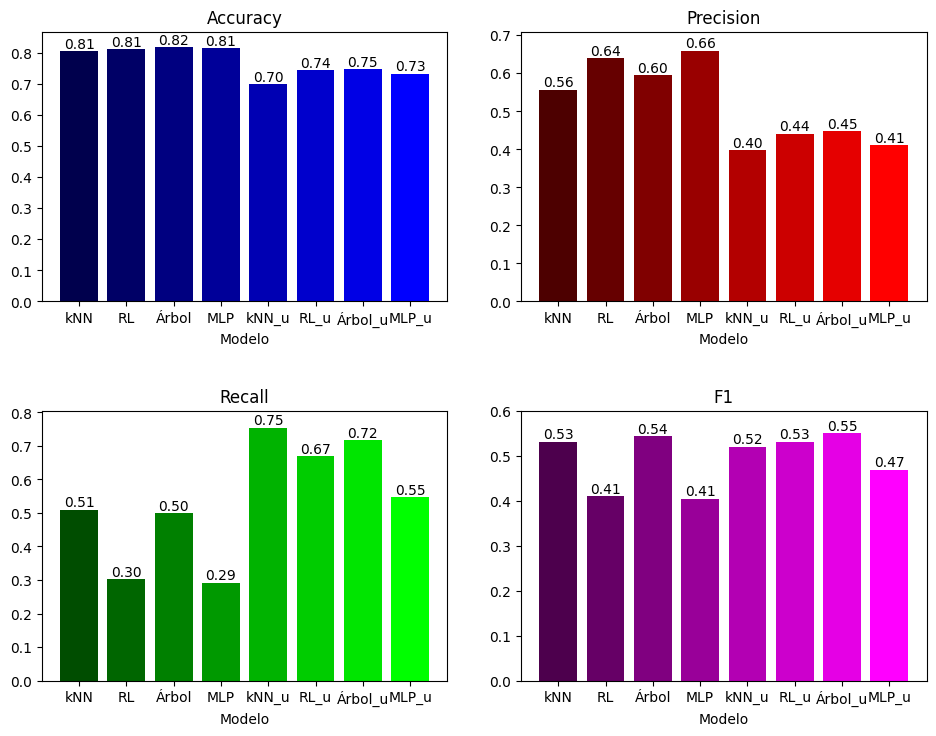

In [ ]:
categorias = ['kNN', 'RL', 'Árbol', 'MLP','kNN_u', 'RL_u', 'Árbol_u', 'MLP_u']

# Obtener los valores a representar
valores_accuracy = [mejores_knn[0],mejores_regresion[0],mejores_arbol[0],mejores_perceptron[0],mejores_knn_u[0],mejores_regresion_u[0],mejores_arbol_u[0],mejores_perceptron_u[0]]
valores_precision = [mejores_knn[1],mejores_regresion[1],mejores_arbol[1],mejores_perceptron[1],mejores_knn_u[1],mejores_regresion_u[1],mejores_arbol_u[1],mejores_perceptron_u[1]]
valores_recall = [mejores_knn[2],mejores_regresion[2],mejores_arbol[2],mejores_perceptron[2],mejores_knn_u[2],mejores_regresion_u[2],mejores_arbol_u[2],mejores_perceptron_u[2]]
valores_f1 = [mejores_knn[3],mejores_regresion[3],mejores_arbol[3],mejores_perceptron[3],mejores_knn_u[3],mejores_regresion_u[3],mejores_arbol_u[3],mejores_perceptron_u[3]]

# Crear la figura y los subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Aumentar margen superior de la gráfica
axs[0, 0].set_ylim(0, max(valores_accuracy) + 0.05)
axs[0, 1].set_ylim(0, max(valores_precision) + 0.05)
axs[1, 0].set_ylim(0, max(valores_recall) + 0.05)
axs[1, 1].set_ylim(0, max(valores_f1) + 0.05)

# Gráfica de Accuracy
vfinal=[];
for i in np.linspace(0.3, 1, 8):vfinal.append([0,0,i])
axs[0, 0].bar(categorias, valores_accuracy, color=vfinal)
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_xlabel('Modelo')

# Agregar los valores encima de las barras de Accuracy
for i, v in enumerate(valores_accuracy):
    axs[0, 0].text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Gráfica de Precision
vfinal=[];
for i in np.linspace(0.3, 1, 8):vfinal.append([i,0,0])
axs[0, 1].bar(categorias, valores_precision, color=vfinal)
axs[0, 1].set_title('Precision')
axs[0, 1].set_xlabel('Modelo')

# Agregar los valores encima de las barras de Precision
for i, v in enumerate(valores_precision):
    axs[0, 1].text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Gráfica de Recall
vfinal=[];
for i in np.linspace(0.3, 1, 8):vfinal.append([0,i,0])
axs[1, 0].bar(categorias, valores_recall, color=vfinal)
axs[1, 0].set_title('Recall')
axs[1, 0].set_xlabel('Modelo')

# Agregar los valores encima de las barras de Recall
for i, v in enumerate(valores_recall):
    axs[1, 0].text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Gráfica de F1
vfinal=[];
for i in np.linspace(0.3, 1, 8):vfinal.append([i,0,i])
axs[1, 1].bar(categorias, valores_f1, color=vfinal)
axs[1, 1].set_title('F1')
axs[1, 1].set_xlabel('Modelo')

# Agregar los valores encima de las barras de F1
for i, v in enumerate(valores_f1):
    axs[1, 1].text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Ajustar el diseño
plt.tight_layout(pad=3.0)

# Mostrar la gráfica
plt.show()


(Se muestran cuatro gráficas de barras con las métricas de éxito, a la izquierda los valores usando el dataset de train sesgado, a la derecha y con nombres "modelo_u" los modelos usando el dataset de train undersampleado)

Como se puede observar en la gráfica anterior, el undersampling del training set suele implicar una mejora de los resultados f1, a pesar de reducir el accuracy inicial.

Si bien era de esperar, los datos sin undersampling tienen mayores valores de accuracy a costa de tener valores mucho menores de recall, lo que quiere decir que el modelo se encuentra muy sesgado hacia la clase mayoritaria, por lo que su éxito con el set final puede ser cuestionado al haber un test igual de sesgado que el train, es posible que de tener un test balanceado rindiese mucho peor.

Los mejores resultados, tanto en el undersampled como el train normal, se encuentran en el árbol de decisiones y en el kNN, obteniendo los peores en el regresor lineal.

Como conclusión final, el hecho de que los valores de f1 obtenidos en el test final sean similares o incluso mejores que los obtenidos en la validación parece indicar que los modelos se han entrenado correctamente y evitando overfitting, ya que replican su rendimiento en datasets nuevos.

In [ ]:
%%shell
jupyter nbconvert --to html "Practica1_Aprendizaje_Automatico.ipynb"

[NbConvertApp] WARNING | pattern 'Practica1_Aprendizaje_Automatico.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_ye

CalledProcessError: Command 'jupyter nbconvert --to html "Practica1_Aprendizaje_Automatico.ipynb"
' returned non-zero exit status 255.